# Downloading Libraries


In [139]:
!pip install plotly 

^C


In [140]:
!pip install plotly_express

# Importing Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import glob
import os
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.express as px


In [40]:
import matplotlib.colors as colors

# Collecting Paths

In [41]:
paths = glob.glob(os.path.join("SAWAN_BS/sawan_wells/New_DATA","*.las"))
paths

['SAWAN_BS/sawan_wells/New_DATA\\1-SAWAN-08.las',
 'SAWAN_BS/sawan_wells/New_DATA\\2-SAWAN-01.las',
 'SAWAN_BS/sawan_wells/New_DATA\\3-SAWAN-02.las',
 'SAWAN_BS/sawan_wells/New_DATA\\4-SAWAN-07.las']

# Uploading Wells


In [42]:
wells=[]
for i in paths:
  well = lasio.read(i)
  well = well.df().reset_index()
  wells.append(well)

In [43]:
wells[2].columns

Index(['DEPT', 'BS', 'C1', 'C2', 'CALI', 'CALS', 'CGR', 'DRHO', 'DT', 'GR',
       'LLD', 'LLS', 'MSFL', 'NPHI', 'PEF', 'POTA', 'RHOB', 'SGR', 'SP',
       'THOR', 'TPRA', 'TURA', 'UPRA', 'URAN'],
      dtype='object')

# Changing Column names


In [44]:
wells[3]=wells[3].rename(columns={wells[3].columns[35]:"RHOB"})
wells[3]=wells[3].rename(columns={wells[3].columns[44]:"URAN"})
wells[0]=wells[0].rename(columns={wells[0].columns[1]:"BS"})
wells[1]["BS"]=8.7
wells[3]=wells[3].rename(columns={wells[3].columns[26]:"MSFL"})

# Cleaning Data


In [45]:
def data(wells):
  global data
  data=[]
  desired=["DEPT","CALI","GR","THOR","POTA","LLD","LLS","NPHI","RHOB","CGR","SGR","BS","URAN","MSFL"]
  for i in wells:
    well = i.loc[:,desired]
    well.loc[:,"NPHI"] = well.loc[:,"NPHI"]*100
    well.loc[:,"LLS"] = np.log10(well.loc[:,"LLS"])
    well.loc[:,"LLD"] = np.log10(well.loc[:,"LLD"])
    well.loc[:,"MSFL"] = np.log10(well.loc[:,"MSFL"])
    well = well.dropna(how="any").reset_index(drop=True)
    data.append(well)

In [46]:
data(wells)

E:\anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [47]:
data[0].to_csv("data.csv")

# Displaying logs

In [48]:
wells_name=["SAWAN-08","SAWAN-01","SAWAN-02","SAWAN-07"]

#### Caliper Log


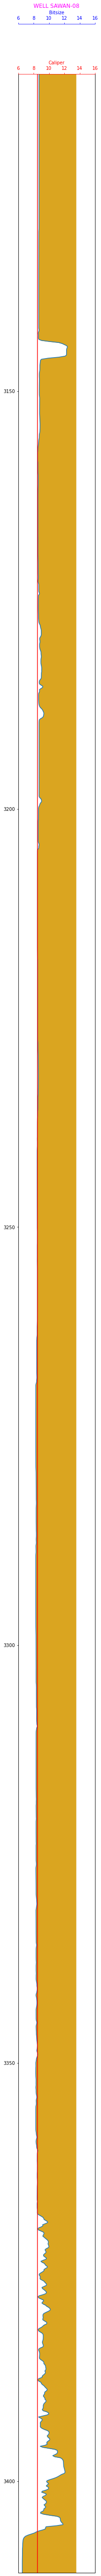

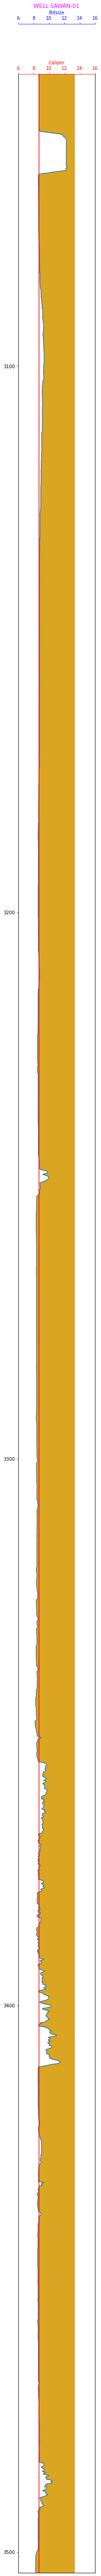

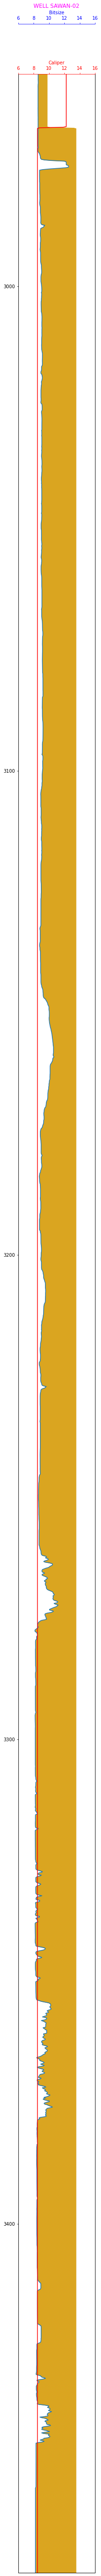

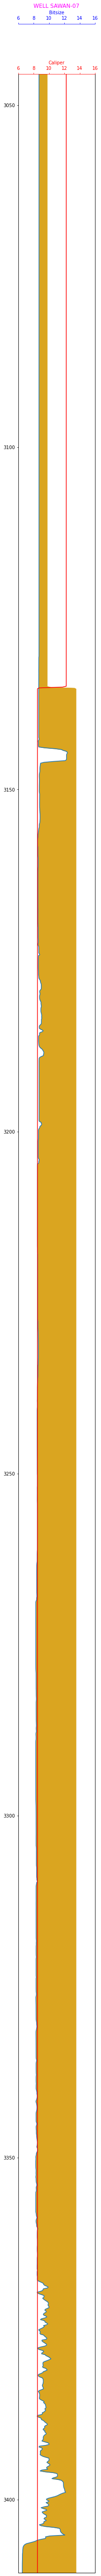

In [49]:
for i in range(len(data)):
  fig = plt.subplots(figsize=(3,100))
  ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
  ax2 = ax1.twiny()
  ax1.plot("CALI","DEPT",data=data[i])
  ax1.set_xlim(6, 16)
  ax1.set_xlabel('Caliper')
  ax1.xaxis.label.set_color("red")
  ax1.tick_params(axis='x', colors="red")
  ax1.spines["top"].set_edgecolor("red")
  ax1.set_title(f"WELL {wells_name[i]}").set_color("magenta")
  ax2.plot("BS","DEPT",data=data[i],color="red")
  ax2.set_xlim(6, 16)
  ax2.set_xlabel('Bitsize')
  ax2.xaxis.label.set_color("blue")
  ax2.spines["top"].set_position(("axes", 1.02))
  ax2.tick_params(axis='x', colors="blue")
  ax2.spines["top"].set_edgecolor("blue")
  x1=data[i]['CALI']
  x2=data[i]['BS']
  x = np.array(ax1.get_xlim())
  z = np.array(ax2.get_xlim())
  nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)
  ax2.axis(ymin=max(data[i]["DEPT"]),ymax= min(data[i]["DEPT"]))
  ax1.axis(ymin=max(data[i]["DEPT"]),ymax= min(data[i]["DEPT"]))
  ax1.fill_betweenx(data[i]['DEPT'], x1, nz, where=x1<=nz, interpolate=True, color='goldenrod')
  ax1.fill_betweenx(data[i]['DEPT'], x1, nz, where=x1>=nz, interpolate=True, color='yellow')
  for ax in [ax1, ax2]:
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

#### Gamma ray log

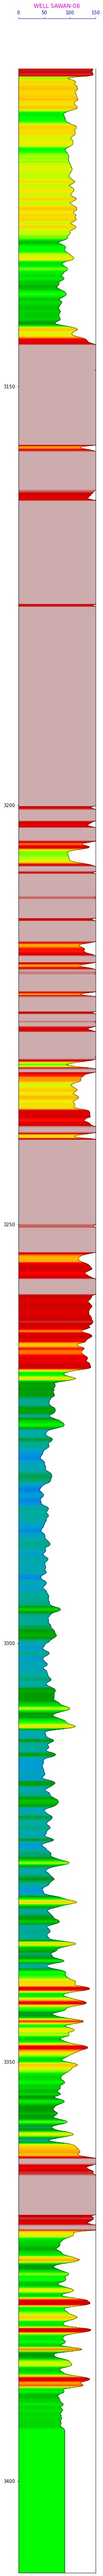

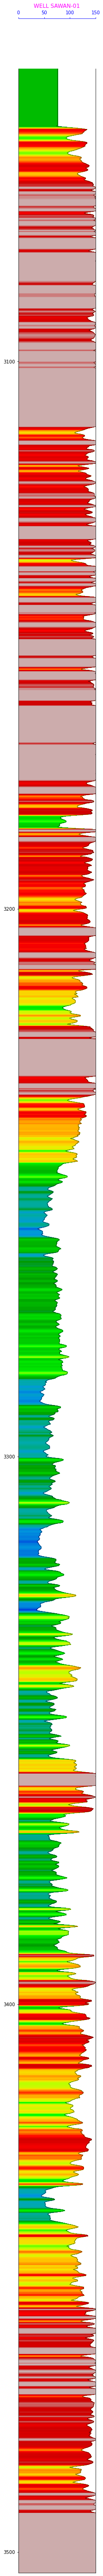

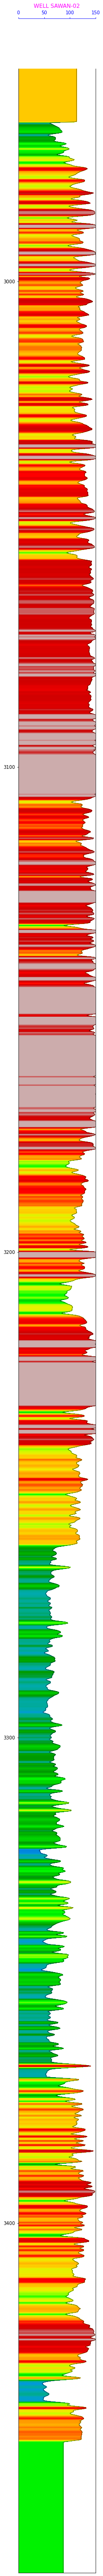

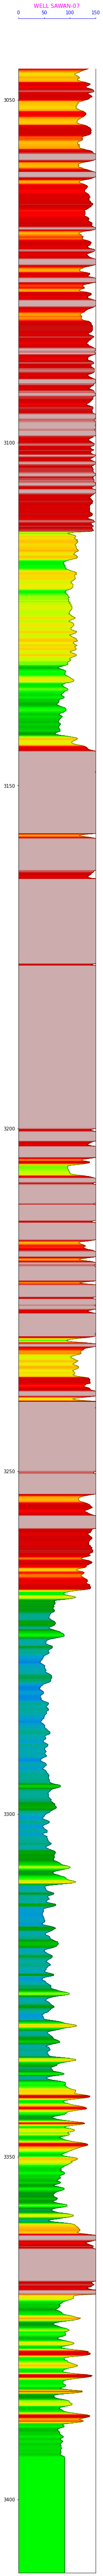

In [50]:
for i in range(len(data)):
  fig = plt.subplots(figsize=(3,100))
  ax = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
  left_col_value = 0
  right_col_value = 150
  curve = data[i]['GR']
  span = abs(left_col_value - right_col_value)
  cmap = plt.get_cmap('nipy_spectral')
  color_index = np.arange(left_col_value, right_col_value, span / 100)
  
  ax.plot('GR','DEPT', c='black', lw=0.5,data=data[i])
  ax.set_title(f"WELL {wells_name[i]}").set_color("magenta")
  ax.set_xlim(0, 150)
  ax.axis(ymin=max(data[i]["DEPT"]),ymax= min(data[i]["DEPT"]))
  ax.xaxis.set_ticks_position("top")
  ax.xaxis.set_label_position("top")
  ax.xaxis.label.set_color("blue")
  ax.yaxis.label.set_color("green")
  ax.spines["top"].set_position(("axes", 1.02))
  ax.tick_params(axis='x', colors="blue")
  ax.spines["top"].set_edgecolor("blue")
  for index in sorted(color_index):
    index_value = (index - left_col_value)/span
    color = cmap(index_value) #obtain colour for color index value
    plt.fill_betweenx(data[i]['DEPT'], 0 , curve, where = curve >= index,  color = color)
  plt.show()

#### Resistivity Log 

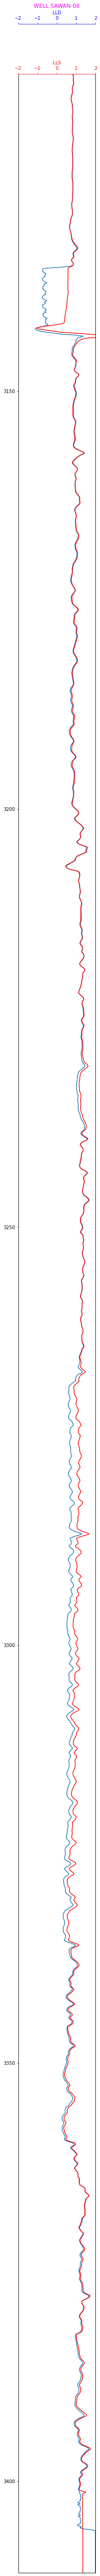

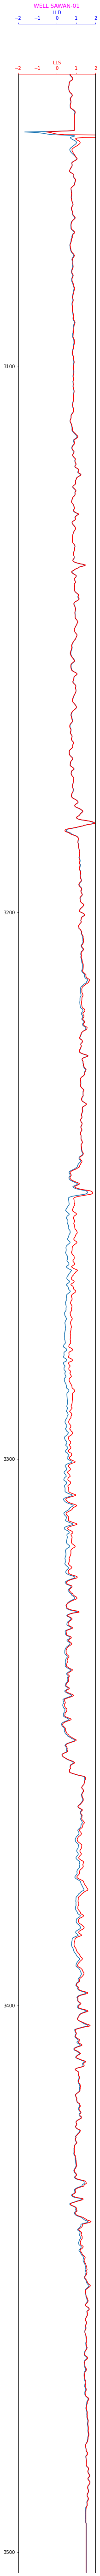

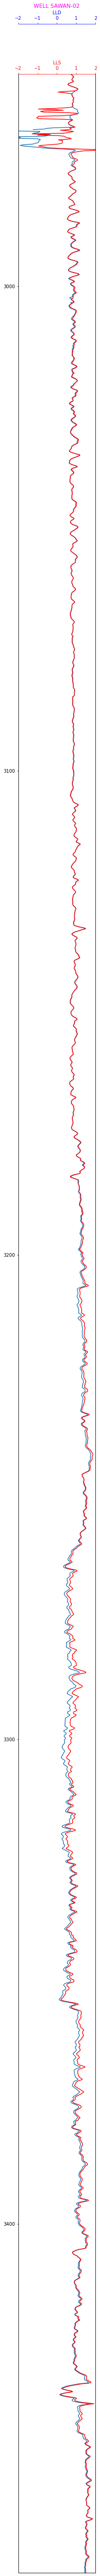

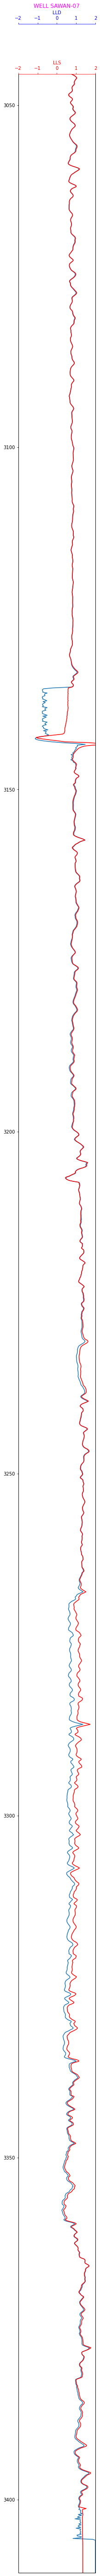

In [51]:
for i in range(len(data)):
  fig = plt.subplots(figsize=(3,100))
  ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
  ax2 = ax1.twiny()
  ax1.plot("LLS","DEPT",data=data[i])
  ax1.set_xlabel('LLS')
  ax1.xaxis.label.set_color("red")
  ax1.tick_params(axis='x', colors="red")
  ax1.spines["top"].set_edgecolor("red")
  ax1.set_title(f"WELL {wells_name[i]}").set_color("magenta")
  ax1.axis(ymin=max(data[i]["DEPT"]),ymax= min(data[i]["DEPT"]))
  ax2.plot("LLD","DEPT",data=data[i],color="red")
  ax2.set_xlabel('LLD')
  ax1.set_xlim(-2, 2)
  ax2.set_xlim(-2, 2)
  ax2.xaxis.label.set_color("blue")
  ax2.spines["top"].set_position(("axes", 1.02))
  ax2.tick_params(axis='x', colors="blue")
  ax2.spines["top"].set_edgecolor("blue")
  ax2.axis(ymin=max(data[i]["DEPT"]),ymax= min(data[i]["DEPT"]))
  for ax in [ax1, ax2]:
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")


#### CrossOver 

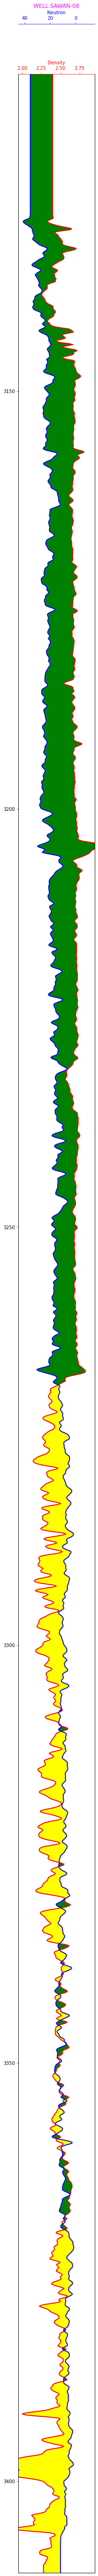

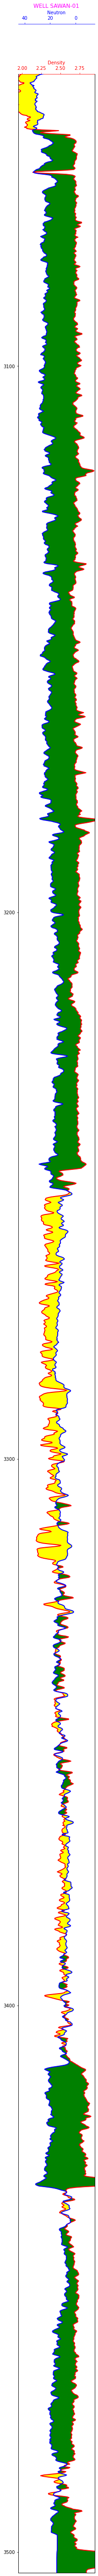

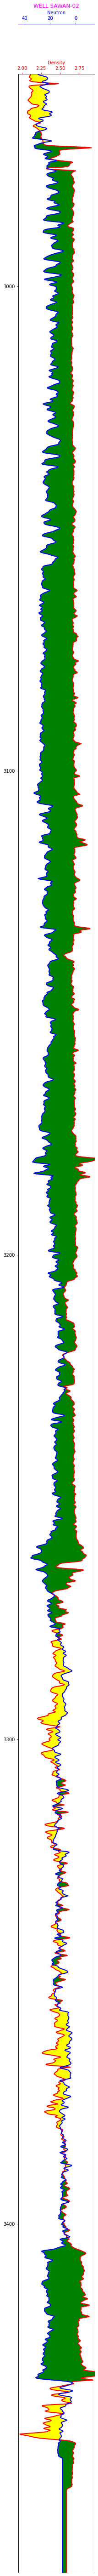

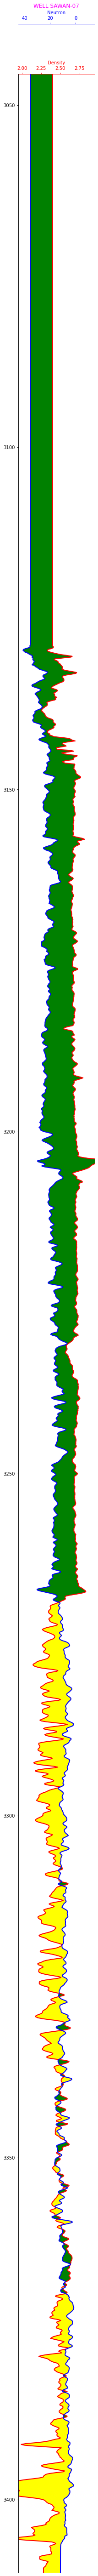

In [52]:
for i in range(len(data)):
  fig = plt.subplots(figsize=(3,100))
  ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
  ax2 = ax1.twiny()
  
  ax1.plot('RHOB', 'DEPT', data=data[i], color='red', lw=2)
  ax1.set_xlim(1.95, 2.95)
  ax1.set_xlabel('Density')
  ax1.xaxis.label.set_color("red")
  ax1.tick_params(axis='x', colors="red")
  ax1.spines["top"].set_edgecolor("red")
  ax1.set_title(f"WELL {wells_name[i]}").set_color("magenta")

  ax2.plot('NPHI', 'DEPT', data=data[i], color='blue', lw=2)
  ax2.set_xlim(45, -15)
  ax2.set_xlabel('Neutron')
  ax2.xaxis.label.set_color("blue")
  ax2.spines["top"].set_position(("axes", 1.02))
  ax2.tick_params(axis='x', colors="blue")
  ax2.spines["top"].set_edgecolor("blue")
  ax2.axis(ymin=max(data[i]["DEPT"]),ymax= min(data[i]["DEPT"]))
  ax1.axis(ymin=max(data[i]["DEPT"]),ymax= min(data[i]["DEPT"]))
  x1=data[i]['RHOB']
  x2=data[i]['NPHI']
  x = np.array(ax1.get_xlim())
  z = np.array(ax2.get_xlim())
  nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)
  ax1.fill_betweenx(data[i]['DEPT'], x1, nz, where=x1>=nz, interpolate=True, color='green')
  ax1.fill_betweenx(data[i]['DEPT'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')
  for ax in [ax1, ax2]:
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

#### Average Porosity

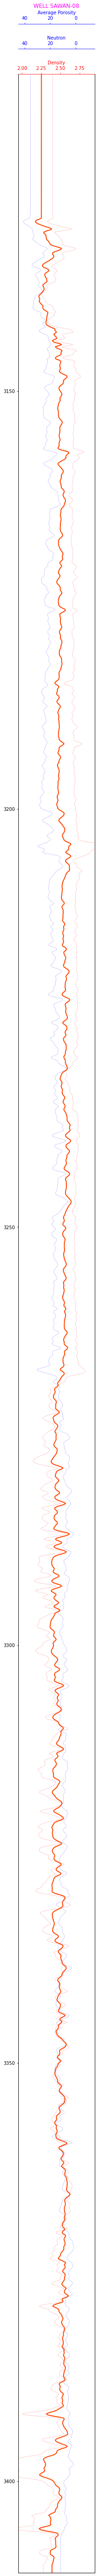

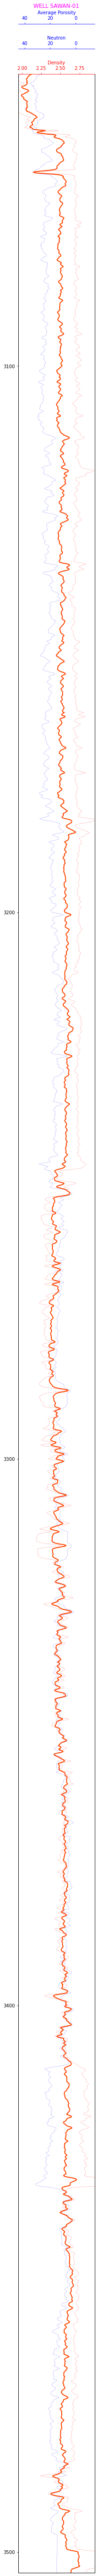

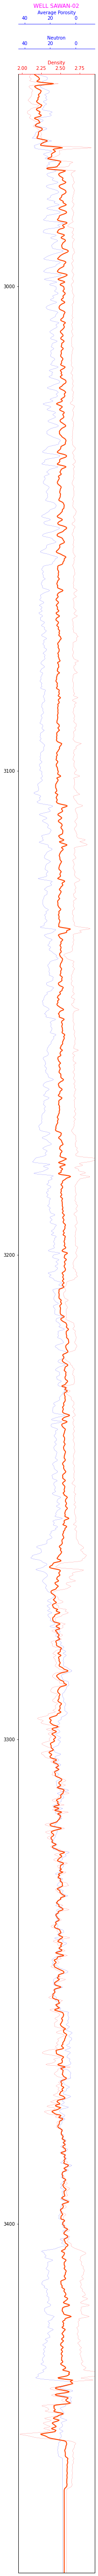

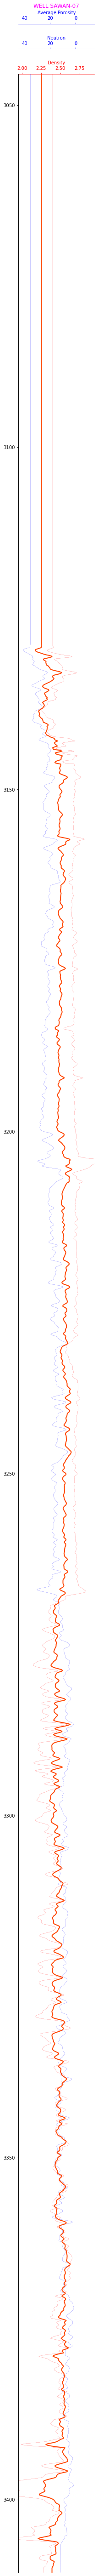

In [53]:

for i in range(len(data)):
  data[i]["Density Porosity"] = ((data[i]["RHOB"] - 2.71)/(1-2.71))*100
  data[i]["Average Porosity"] = (data[i]["Density Porosity"] + data[i]["NPHI"])/2
  fig = plt.subplots(figsize=(3,100))
  ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
  ax2 = ax1.twiny()
  ax3 = ax1.twiny()
  ax1.plot('RHOB', 'DEPT', data=data[i], color='red', lw=0.2)
  ax1.set_xlim(1.95, 2.95)
  ax1.set_xlabel('Density')
  ax1.xaxis.label.set_color("red")
  ax1.tick_params(axis='x', colors="red")
  ax1.spines["top"].set_edgecolor("red")

  ax2.plot('NPHI', 'DEPT', data=data[i], color='blue', lw=0.2)
  ax2.set_xlim(45, -15)
  ax2.set_xlabel('Neutron')
  ax2.xaxis.label.set_color("blue")
  ax2.spines["top"].set_position(("axes", 1.01))
  ax2.tick_params(axis='x', colors="blue")
  ax2.spines["top"].set_edgecolor("blue")
  ax1.set_title(f"WELL {wells_name[i]}").set_color("magenta")

  ax3.plot('Average Porosity', 'DEPT', data=data[i], color='orangered', lw=2)
  ax3.set_xlim(45, -15)
  ax3.set_xlabel('Average Porosity')
  ax3.xaxis.label.set_color("blue")
  ax3.spines["top"].set_position(("axes", 1.02))
  ax3.tick_params(axis='x', colors="blue")
  ax3.spines["top"].set_edgecolor("blue")
  ax2.axis(ymin=max(data[i]["DEPT"]),ymax= min(data[i]["DEPT"]))
  ax1.axis(ymin=max(data[i]["DEPT"]),ymax= min(data[i]["DEPT"]))
  ax3.axis(ymin=max(data[i]["DEPT"]),ymax= min(data[i]["DEPT"]))
  for ax in [ax1, ax2]:
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

In [54]:
data[0]

DEPT    CALI        GR     THOR    POTA       LLD       LLS   NPHI  \
0     3112.0707  8.7006  142.9879  12.7700  0.0203  0.821906  0.816533  35.51   
1     3112.1957  8.7006  144.5001  12.7700  0.0203  0.841410  0.835316  35.51   
2     3112.3207  8.7006  143.0280  12.7700  0.0203  0.854701  0.848522  35.51   
3     3112.4457  8.7006  142.6371  12.7700  0.0203  0.857971  0.852480  35.51   
4     3112.5707  8.7006  143.3424  12.7700  0.0203  0.855780  0.850236  35.51   
...         ...     ...       ...      ...     ...       ...       ...    ...   
2387  3410.4457  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   
2388  3410.5707  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   
2389  3410.6957  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   
2390  3410.8207  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   
2391  3410.9457  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   

        RHOB       CGR       SGR   BS     URAN      MSFL  Density Porosity  \
0     2.3998   79.1427   66.7871  8.5  -1.5943 -1.045275         18.140351   
1     2.3998   79.1427   66.7871  8.5  -1.5943 -1.045757         18.140351   
2     2.3998   79.1427   66.7871  8.5  -1.5943 -1.045757         18.140351   
3     2.3998   79.1427   66.7871  8.5  -1.5943 -1.045757         18.140351   
4     2.3998   79.1427   66.7871  8.5  -1.5943 -1.045275         18.140351   
...      ...       ...       ...  ...      ...       ...               ...   
2387  2.2798  319.2700  102.2173  8.5 -28.0069  0.009068         25.157895   
2388  2.2798  319.2700  102.2173  8.5 -28.0069  0.009068         25.157895   
2389  2.2798  319.2700  102.2173  8.5 -28.0069  0.009068         25.157895   
2390  2.2798  319.2700  102.2173  8.5 -28.0069  0.009068         25.157895   
2391  2.2798  319.2700  102.2173  8.5 -28.0069  0.009068         25.157895   

      Average Porosity  
0            26.825175  
1            26.825175  
2            26.825175  
3            26.825175  
4            26.825175  
...                ...  
2387         18.538947  
2388         18.538947  
2389         18.538947  
2390         18.538947  
2391         18.538947  

[2392 rows x 16 columns]

#### CGR and SGR

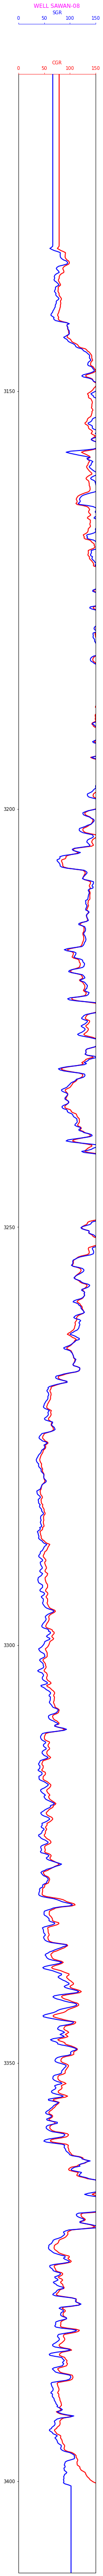

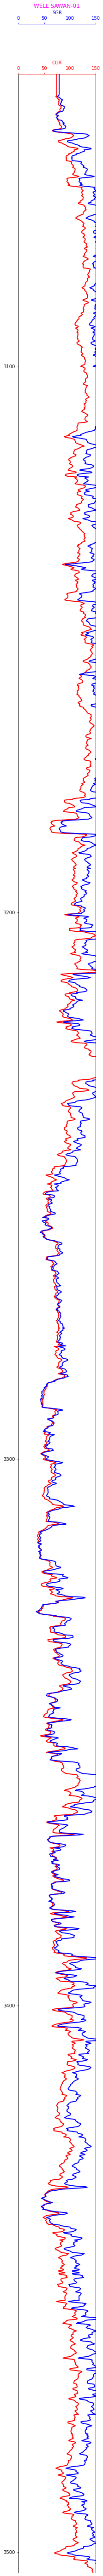

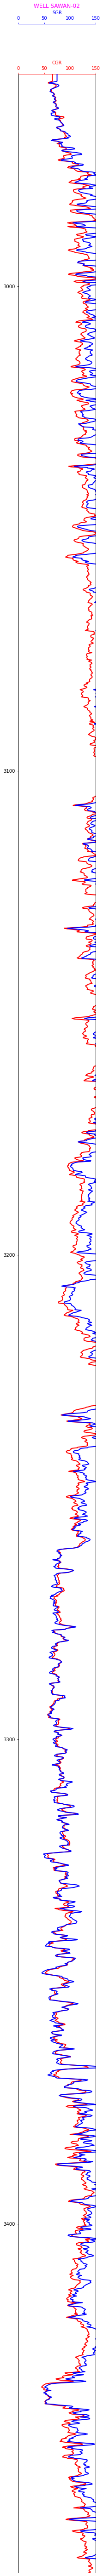

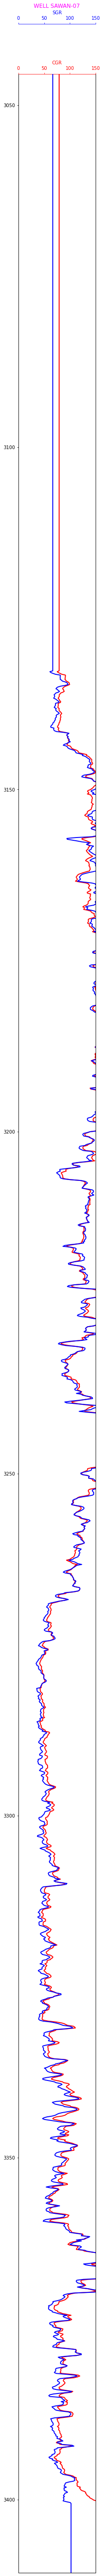

In [55]:
for i in range(len(data)):
  fig = plt.subplots(figsize=(3,100))
  ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
  ax2 = ax1.twiny()
  
  ax1.plot('CGR', 'DEPT', data=data[i], color='red', lw=2)
  ax1.set_xlim(0, 150)
  ax1.set_xlabel('CGR')
  ax1.xaxis.label.set_color("red")
  ax1.tick_params(axis='x', colors="red")
  ax1.spines["top"].set_edgecolor("red")
  ax1.set_title(f"WELL {wells_name[i]}").set_color("magenta")

  ax2.plot('SGR', 'DEPT', data=data[i], color='blue', lw=2)
  ax2.set_xlim(0, 150)
  ax2.set_xlabel('SGR')
  ax2.xaxis.label.set_color("blue")
  ax2.spines["top"].set_position(("axes", 1.02))
  ax2.tick_params(axis='x', colors="blue")
  ax2.spines["top"].set_edgecolor("blue")
  ax2.axis(ymin=max(data[i]["DEPT"]),ymax= min(data[i]["DEPT"]))
  ax1.axis(ymin=max(data[i]["DEPT"]),ymax= min(data[i]["DEPT"]))
  for ax in [ax1, ax2]:
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

#### Potassium 

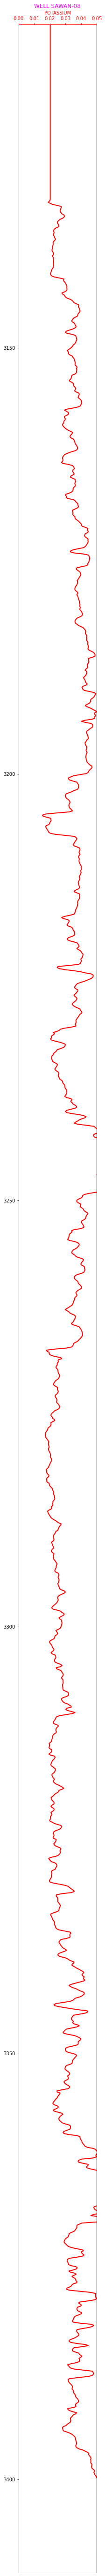

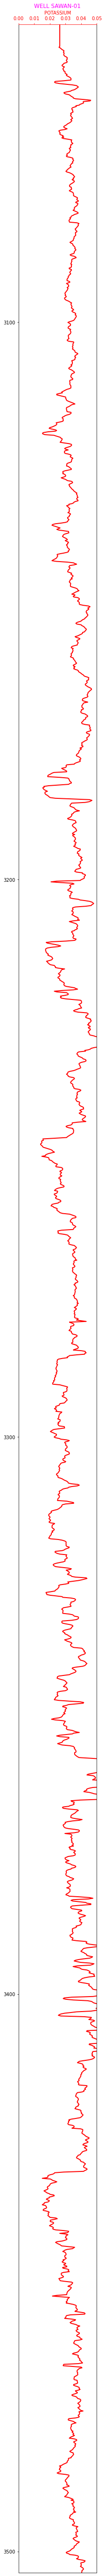

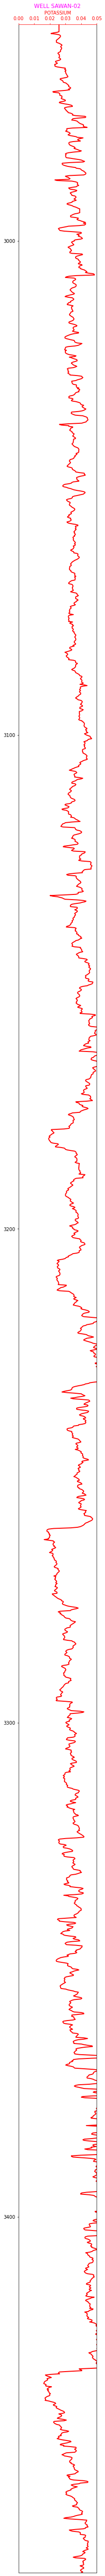

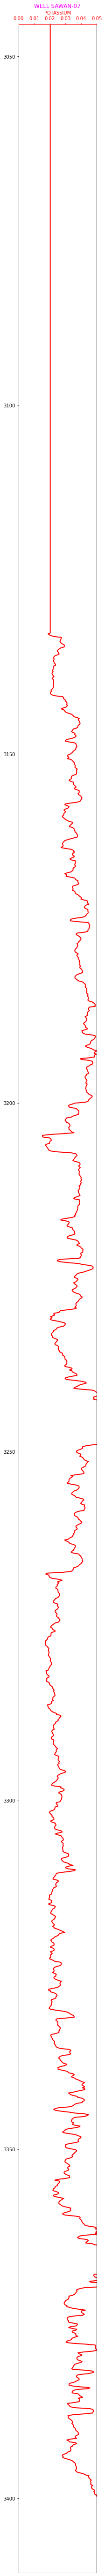

In [56]:
for i in range(len(data)):
  fig = plt.subplots(figsize=(3,100))
  ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)

  
  ax1.plot('POTA', 'DEPT', data=data[i], color='red', lw=2)
  ax1.set_xlim(0, 0.05)
  ax1.set_xlabel('POTASSIUM')
  ax1.xaxis.label.set_color("red")
  ax1.tick_params(axis='x', colors="red")
  ax1.spines["top"].set_edgecolor("red")
  ax1.set_title(f"WELL {wells_name[i]}").set_color("magenta")
  ax1.axis(ymin=max(data[i]["DEPT"]),ymax= min(data[i]["DEPT"]))
  for ax in [ax1]:
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

#### Thorium 

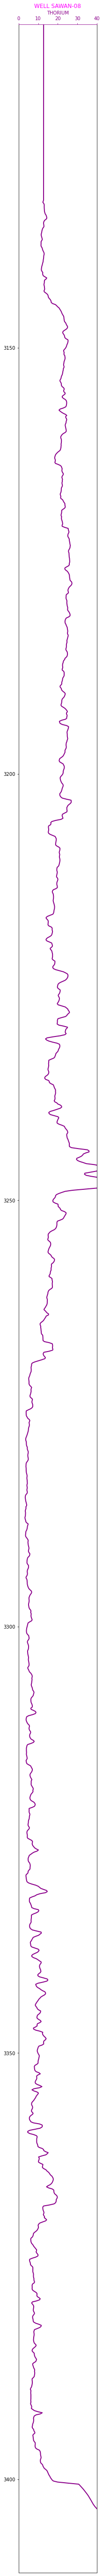

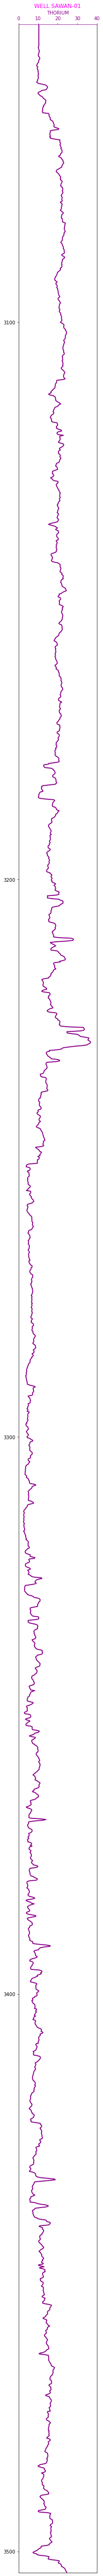

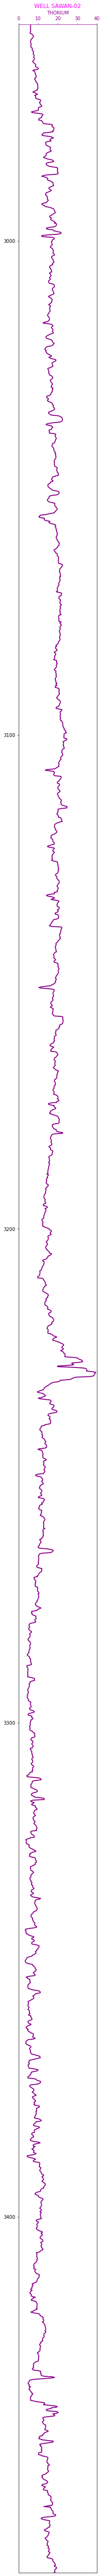

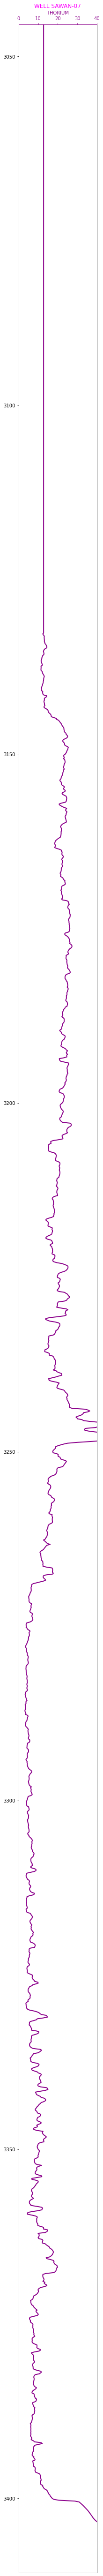

In [57]:
for i in range(len(data)):
  fig = plt.subplots(figsize=(3,100))
  ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)

  
  ax1.plot('THOR', 'DEPT', data=data[i], color="darkmagenta", lw=2)
  ax1.set_xlim(0, 40)
  ax1.set_xlabel('THORIUM')
  ax1.xaxis.label.set_color("darkmagenta")
  ax1.tick_params(axis='x', colors="darkmagenta")
  ax1.spines["top"].set_edgecolor("darkmagenta")
  ax1.set_title(f"WELL {wells_name[i]}").set_color("magenta")
  ax1.axis(ymin=max(data[i]["DEPT"]),ymax= min(data[i]["DEPT"]))
  for ax in [ax1]:
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

#### Uranium


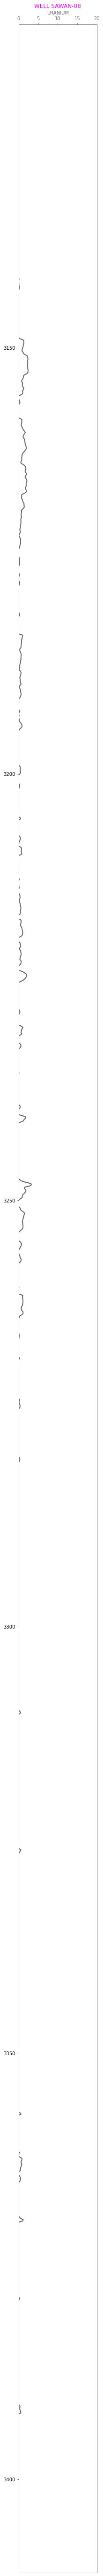

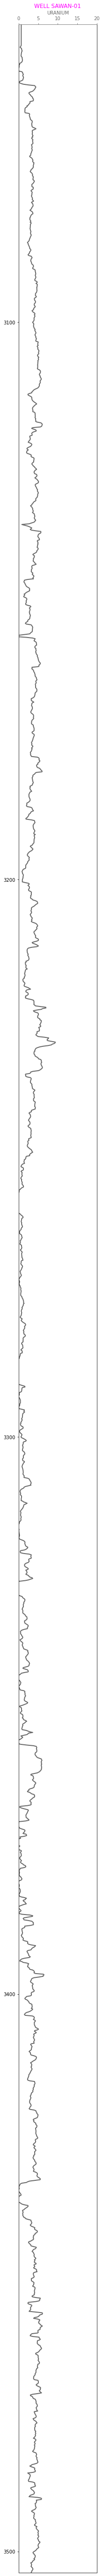

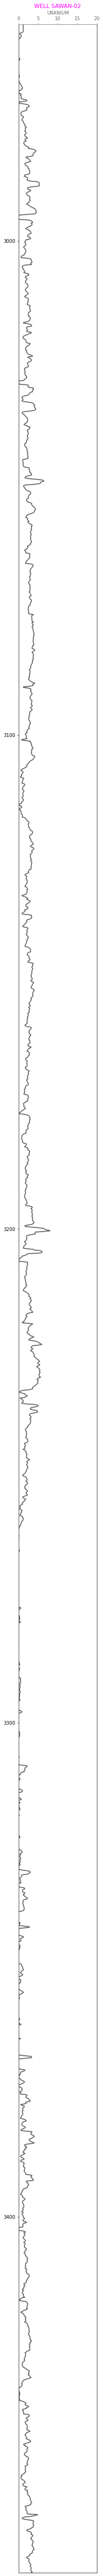

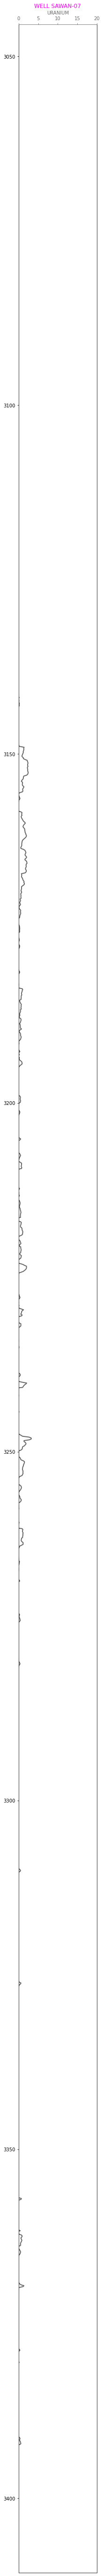

In [58]:
for i in range(len(data)):
  fig = plt.subplots(figsize=(3,100))
  ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)

  
  ax1.plot('URAN', 'DEPT', data=data[i], color="dimgrey", lw=2)
  ax1.set_xlim(0, 20)
  ax1.set_xlabel('URANIUM')
  ax1.xaxis.label.set_color("dimgrey")
  ax1.tick_params(axis='x', colors="dimgrey")
  ax1.spines["top"].set_edgecolor("dimgrey")
  ax1.set_title(f"WELL {wells_name[i]}").set_color("magenta")
  ax1.axis(ymin=max(data[i]["DEPT"]),ymax= min(data[i]["DEPT"]))
  for ax in [ax1]:
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

#### Gamma Ray Trend

In [ ]:
for i in range(len(data)):
  fig = plt.subplots(figsize=(3,700))
  ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
  ax2 = ax1.twiny()
  ax3 = ax1.twiny()
  ax1.set_xlim(150, 0)
  ax1.set_xlabel('GR')
  ax1.xaxis.label.set_color("white")
  ax1.tick_params(axis='x', colors="white")
  ax1.spines["top"].set_edgecolor("white")
  ax1.set_title(f"WELL {wells_name[i]}").set_color("magenta")
  ax1.axis(ymin=max(data[i]["DEPT"]),ymax= min(data[i]["DEPT"]))
  ax2.scatter(75*np.ones((len(data[i]["DEPT"]))),data[i]["DEPT"],s=1)
  ax2.set_xlim(150, 0)
  x1=75*np.ones((len(data[i]["DEPT"])))
  x2=data[i]["GR"]
  x = np.array(ax1.get_xlim())
  z = np.array(ax2.get_xlim())
  nz=((x2-np.min(z))/(np.max(z)-np.min(z)))*(np.min(x)-np.max(x))+np.max(x)
  ax2.fill_betweenx(data[i]['DEPT'], x1, nz, where=x1>=nz, interpolate=True, color='black')
  ax2.fill_betweenx(data[i]['DEPT'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')
  ax3.set_xlim(0,150)
  ax1.get_xaxis().set_visible(False)
  ax2.get_xaxis().set_visible(False)
  ax1.set_yticks(np.arange(min(data[i]["DEPT"]),max(data[i]["DEPT"]),0.2))
  ax1.set_yticks(data[i]["DEPT"])
  ax1.tick_params(axis='y', colors="blue")
  for ax in [ax1]:
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

In [59]:
data[0].describe()

DEPT         CALI           GR         THOR         POTA  \
count  2392.000000  2392.000000  2392.000000  2392.000000  2392.000000   
mean   3261.508200     8.644584   119.246127    15.072159     0.035519   
std      86.331906     0.625488    51.092637     8.822340     0.016805   
min    3112.070700     6.525400    40.665500     3.237800     0.015300   
25%    3186.789450     8.338475    79.548450     7.304500     0.024075   
50%    3261.508200     8.526850   107.782350    12.770000     0.033800   
75%    3336.226950     8.700600   160.868375    21.773450     0.039600   
max    3410.945700    12.396400   345.996400    46.117800     0.107700   

               LLD          LLS         NPHI         RHOB          CGR  \
count  2392.000000  2392.000000  2392.000000  2392.000000  2392.000000   
mean      1.036544     0.921463    15.695263     2.520817   111.632649   
std       0.283606     0.414835     8.530334     0.175721    55.039467   
min      -1.058489    -1.124360     1.420000     1.827600    41.519300   
25%       0.837266     0.707617     8.920000     2.399800    76.658100   
50%       1.033496     0.898854    13.960000     2.526850    99.357350   
75%       1.265099     1.224697    21.072500     2.681900   138.772675   
max       2.418283     1.993877    41.060000     3.054700   319.370400   

               SGR      BS         URAN         MSFL  Density Porosity  \
count  2392.000000  2392.0  2392.000000  2392.000000       2392.000000   
mean    100.386561     8.5    -1.451116     0.719426         11.063306   
std      43.549432     0.0     4.993223     0.605881         10.276075   
min      34.788900     8.5   -28.019300    -1.052566        -20.157895   
25%      66.787100     8.5    -1.213275     0.209207          1.643275   
50%      93.786750     8.5    -0.678750     0.847168         10.710526   
75%     135.881825     8.5     0.044775     1.194285         18.140351   
max     301.624900     8.5     3.250800     3.154521         51.602339   

       Average Porosity  
count       2392.000000  
mean          13.379284  
std            5.461468  
min            3.446433  
25%            9.398523  
50%           12.378787  
75%           15.834379  
max           31.544620

In [60]:
data[1]

DEPT    CALI        GR     THOR    POTA       LLD       LLS   NPHI  \
0     3046.5344  8.6982   76.2033  10.3278  0.0264  0.712085  0.688082  25.63   
1     3046.6594  8.6961   76.2033  10.3278  0.0264  0.697473  0.673620  27.93   
2     3046.7844  8.6956   76.2033  10.3278  0.0264  0.704236  0.679264  29.02   
3     3046.9093  8.6967   76.2033  10.3278  0.0264  0.733141  0.710371  30.13   
4     3047.0343  8.6980   76.2033  10.3278  0.0264  0.770366  0.751418  31.02   
...         ...     ...       ...      ...     ...       ...       ...    ...   
3654  3503.2788  8.2664  173.9846  23.8628  0.0412  1.512406  1.525507  14.80   
3655  3503.4038  8.2664  173.9846  23.9744  0.0406  1.512406  1.525507  14.80   
3656  3503.5288  8.2664  173.9846  24.2961  0.0406  1.512406  1.525507  14.80   
3657  3503.6538  8.2664  173.9846  24.4500  0.0405  1.512406  1.525507  14.80   
3658  3503.7788  8.2664  173.9846  24.5507  0.0404  1.512406  1.525507  14.80   

        RHOB       CGR       SGR   BS    URAN      MSFL  Density Porosity  \
0     1.9926   74.6251   79.1723  8.7  0.6733 -0.104688         41.953216   
1     1.9825   74.6251   79.1723  8.7  0.6733 -0.089376         42.543860   
2     1.9707   74.6251   79.1723  8.7  0.6733 -0.071297         43.233918   
3     1.9654   74.6251   79.1723  8.7  0.6733 -0.062633         43.543860   
4     1.9627   74.6251   79.1723  8.7  0.6733 -0.058389         43.701754   
...      ...       ...       ...  ...     ...       ...               ...   
3654  2.8492  143.5255  167.8583  8.7  3.6031 -0.157516         -8.140351   
3655  2.8409  143.0423  166.2131  8.7  3.4311 -0.158015         -7.654971   
3656  2.8393  144.2090  167.0342  8.7  3.3799 -0.159267         -7.561404   
3657  2.8393  144.5916  166.8326  8.7  3.2934 -0.161529         -7.561404   
3658  2.8393  144.8510  166.5550  8.7  3.2139 -0.163549         -7.561404   

      Average Porosity  
0            33.791608  
1            35.236930  
2            36.126959  
3            36.836930  
4            37.360877  
...                ...  
3654          3.329825  
3655          3.572515  
3656          3.619298  
3657          3.619298  
3658          3.619298  

[3659 rows x 16 columns]

# Non washout zones

In [61]:
sawan_well_1 = [3150,3368] 
# sawan_well_2 = [3250,3350]
# sawan_well_7 = [3270,3365]
sawan_well_8 = [3133,3355]

In [62]:
# data[0] = data[0][(data[0]["DEPT"]>sawan_well_8[0]) & (data[0]["DEPT"]<sawan_well_8[1])]
# data[1] = data[1][(data[1]["DEPT"]>sawan_well_1[0]) & (data[1]["DEPT"]<sawan_well_1[1])]


# Clay volume  Linear

In [63]:
for i in data:
    i["Clay Volume"] = ((i["GR"]-i["GR"].min())/(i["GR"].max()-i["GR"].min()))*100

In [64]:
for i in data:
    a = ((i["GR"]-i["GR"].min())/(i["GR"].max()-i["GR"].min()))
    i["Clay Volume"] = (a/(3-(2*a)))*100

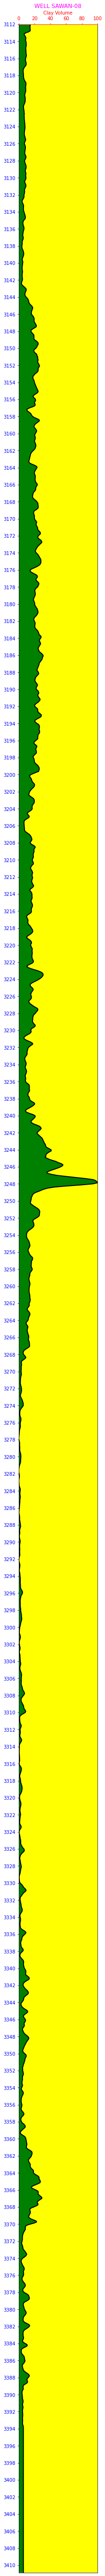

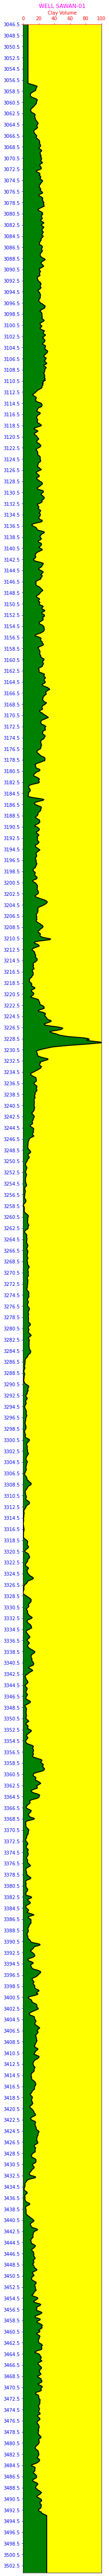

Error in callback <function flush_figures at 0x000000EE0943E4C0> (for post_execute):


KeyboardInterrupt: 

In [65]:
for i in range(len(data)):
  fig = plt.subplots(figsize=(3,100))
  ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
  ax1.plot('Clay Volume', 'DEPT', data=data[i], color='black', lw=2)
  ax1.set_xlim(0, 100)
  ax1.set_xlabel('Clay Volume')
  ax1.xaxis.label.set_color("red")
  ax1.tick_params(axis='x', colors="red")
  ax1.spines["top"].set_edgecolor("red")
  ax1.set_yticks(np.arange(min(data[i]["DEPT"]),max(data[i]["DEPT"]),2))
  ax1.tick_params(axis='y', colors="blue")
  ax1.axis(ymin=max(data[i]["DEPT"]),ymax= min(data[i]["DEPT"]))
  ax1.set_title(f"WELL {wells_name[i]}").set_color("magenta")
  ax1.fill_betweenx(data[i]['DEPT'], data[i]['Clay Volume'], 0, facecolor='green')
  ax1.fill_betweenx(data[i]['DEPT'], data[i]['Clay Volume'], 100, facecolor='yellow')  

  
  for ax in [ax1]:
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

### Clay Effect

In [66]:
for i in data:
    Porosity = i[i["Clay Volume"]==100.0]["Average Porosity"].values
    i["Clay Effect"] = (i["Clay Volume"]/100)*Porosity


In [67]:
for i in data:
    Porosity = i[i["Clay Volume"]==100.0]["Average Porosity"].values
    i["Clay Effect"] = (i["Clay Volume"]/100)*Porosity

### Effective Porosity 

In [68]:
for i in data:
    i["Effective Porosity"] = i["Average Porosity"] - i["Clay Effect"]

In [69]:
data[0]

DEPT    CALI        GR     THOR    POTA       LLD       LLS   NPHI  \
0     3112.0707  8.7006  142.9879  12.7700  0.0203  0.821906  0.816533  35.51   
1     3112.1957  8.7006  144.5001  12.7700  0.0203  0.841410  0.835316  35.51   
2     3112.3207  8.7006  143.0280  12.7700  0.0203  0.854701  0.848522  35.51   
3     3112.4457  8.7006  142.6371  12.7700  0.0203  0.857971  0.852480  35.51   
4     3112.5707  8.7006  143.3424  12.7700  0.0203  0.855780  0.850236  35.51   
...         ...     ...       ...      ...     ...       ...       ...    ...   
2387  3410.4457  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   
2388  3410.5707  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   
2389  3410.6957  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   
2390  3410.8207  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   
2391  3410.9457  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   

        RHOB       CGR       SGR   BS     URAN      MSFL  Density Porosity  \
0     2.3998   79.1427   66.7871  8.5  -1.5943 -1.045275         18.140351   
1     2.3998   79.1427   66.7871  8.5  -1.5943 -1.045757         18.140351   
2     2.3998   79.1427   66.7871  8.5  -1.5943 -1.045757         18.140351   
3     2.3998   79.1427   66.7871  8.5  -1.5943 -1.045757         18.140351   
4     2.3998   79.1427   66.7871  8.5  -1.5943 -1.045275         18.140351   
...      ...       ...       ...  ...      ...       ...               ...   
2387  2.2798  319.2700  102.2173  8.5 -28.0069  0.009068         25.157895   
2388  2.2798  319.2700  102.2173  8.5 -28.0069  0.009068         25.157895   
2389  2.2798  319.2700  102.2173  8.5 -28.0069  0.009068         25.157895   
2390  2.2798  319.2700  102.2173  8.5 -28.0069  0.009068         25.157895   
2391  2.2798  319.2700  102.2173  8.5 -28.0069  0.009068         25.157895   

      Average Porosity  Clay Volume  Clay Effect  Effective Porosity  
0            26.825175    14.384298     1.014842           25.810334  
1            26.825175    14.659206     1.034237           25.790938  
2            26.825175    14.391557     1.015354           25.809822  
3            26.825175    14.320858     1.010366           25.814810  
4            26.825175    14.448534     1.019374           25.805802  
...                ...          ...          ...                 ...  
2387         18.538947     5.969705     0.421175           18.117772  
2388         18.538947     5.969705     0.421175           18.117772  
2389         18.538947     5.969705     0.421175           18.117772  
2390         18.538947     5.969705     0.421175           18.117772  
2391         18.538947     5.969705     0.421175           18.117772  

[2392 rows x 19 columns]

In [70]:
paths

['SAWAN_BS/sawan_wells/New_DATA\\1-SAWAN-08.las',
 'SAWAN_BS/sawan_wells/New_DATA\\2-SAWAN-01.las',
 'SAWAN_BS/sawan_wells/New_DATA\\3-SAWAN-02.las',
 'SAWAN_BS/sawan_wells/New_DATA\\4-SAWAN-07.las']

### Sawan well : 1

In [71]:
sawan_1 =  pd.read_excel("Thesis_wells/ZOOM_GR/1.xlsx")
sawan_1

First    Second  Depositional Environment
0    3046.5   3250.2                       TS
1    3250.2   3260.2                       DC
2    3260.2   3276.4                       DF
3    3276.4   3285.4                    DFlow
4    3285.4   3290.7                       PD
5    3290.7   3295.0                       DC
6    3295.0   3300.3                       PD
7    3300.4   3307.8                       DC
8    3307.9   3308.9                       TS
9    3309.0   3311.4                       PD
10   3311.5   3312.2                       TS
11   3312.3   3318.7                       PD
12   3318.8   3320.9                       DF
13   3321.0   3324.4                       PD
14   3324.5   3325.9                       TS
15   3326.0   3328.7                       DC
16   3328.8   3330.7                       TS
17   3330.8   3331.7                       DC
18   3331.8   3332.8                       TS
19   3332.9   3333.3                       DC
20   3333.4   3334.7                       TS
21   3334.8   3337.7                    DFlow
22   3337.8   3342.4                       TS
23   3342.5   3347.2                       PD
24   3347.3   3347.9                    DFlow
25   3348.0   3352.3                       PD
26   3352.4   3353.4                       TS
27   3353.4   3355.2                       PD
28   3355.3   3365.9                       TS
29   3366.0   3366.8                       PD
30   3366.9   3368.9                       TS
31   3369.0   3376.4                       PD
32   3376.4   3377.3                       TS
33   3377.3   3378.7                       PD
34   3378.8   3379.4                       TS
35   3379.5   3382.3                       PD
36   3382.4   3383.9                       TS
37   3384.0   3385.4                       PD
38   3385.5   3433.3                       TS
39   3433.4   3437.3                       PD
40   3437.4   3437.9                       TS
41   3438.0   3439.7                       PD
42   3439.8   3503.8                       TS

In [105]:
for i in range(len(data)):
  dep = 0 
  data[i]["Depositional Environment"] = dep

In [106]:
rounded_depth=[]
for i in range(len(data)):
  A = round(data[i],1)
  rounded_depth.append(A)

In [107]:
for i in range(len(sawan_1)):
  a = rounded_depth[1][rounded_depth[1]["DEPT"]== sawan_1.loc[i][0]]
  a = a.index[0]
  b = rounded_depth[1][rounded_depth[1]["DEPT"]== sawan_1.loc[i][1]]
  b = b.index[0]
  Depositional_Environment = sawan_1.loc[i][2]
  data[1].loc[a:b,"Depositional Environment"]=Depositional_Environment

In [108]:
paths

['SAWAN_BS/sawan_wells/New_DATA\\1-SAWAN-08.las',
 'SAWAN_BS/sawan_wells/New_DATA\\2-SAWAN-01.las',
 'SAWAN_BS/sawan_wells/New_DATA\\3-SAWAN-02.las',
 'SAWAN_BS/sawan_wells/New_DATA\\4-SAWAN-07.las']

In [122]:
dictt={"TS":1,
       "PD":2,
       "DC":3,
       "DF":4,
       "DFlow":5}

In [120]:
depo = ["TS","PD","DC","DF","DFlow"]
for i in range(len(data)):
  dep = 0 
  data[i]["Grain Size"] = dep

In [123]:
data[1]["Depositional Environment Label"] = data[1]["Depositional Environment"].map(dictt)

In [124]:
data[1]

DEPT    CALI        GR     THOR    POTA       LLD       LLS   NPHI  \
0     3046.5344  8.6982   76.2033  10.3278  0.0264  0.712085  0.688082  25.63   
1     3046.6594  8.6961   76.2033  10.3278  0.0264  0.697473  0.673620  27.93   
2     3046.7844  8.6956   76.2033  10.3278  0.0264  0.704236  0.679264  29.02   
3     3046.9093  8.6967   76.2033  10.3278  0.0264  0.733141  0.710371  30.13   
4     3047.0343  8.6980   76.2033  10.3278  0.0264  0.770366  0.751418  31.02   
...         ...     ...       ...      ...     ...       ...       ...    ...   
3654  3503.2788  8.2664  173.9846  23.8628  0.0412  1.512406  1.525507  14.80   
3655  3503.4038  8.2664  173.9846  23.9744  0.0406  1.512406  1.525507  14.80   
3656  3503.5288  8.2664  173.9846  24.2961  0.0406  1.512406  1.525507  14.80   
3657  3503.6538  8.2664  173.9846  24.4500  0.0405  1.512406  1.525507  14.80   
3658  3503.7788  8.2664  173.9846  24.5507  0.0404  1.512406  1.525507  14.80   

        RHOB       CGR  ...    URAN      MSFL  Density Porosity  \
0     1.9926   74.6251  ...  0.6733 -0.104688         41.953216   
1     1.9825   74.6251  ...  0.6733 -0.089376         42.543860   
2     1.9707   74.6251  ...  0.6733 -0.071297         43.233918   
3     1.9654   74.6251  ...  0.6733 -0.062633         43.543860   
4     1.9627   74.6251  ...  0.6733 -0.058389         43.701754   
...      ...       ...  ...     ...       ...               ...   
3654  2.8492  143.5255  ...  3.6031 -0.157516         -8.140351   
3655  2.8409  143.0423  ...  3.4311 -0.158015         -7.654971   
3656  2.8393  144.2090  ...  3.3799 -0.159267         -7.561404   
3657  2.8393  144.5916  ...  3.2934 -0.161529         -7.561404   
3658  2.8393  144.8510  ...  3.2139 -0.163549         -7.561404   

      Average Porosity  Clay Volume  Clay Effect  Effective Porosity  \
0            33.791608     6.290231     0.348155           33.443453   
1            35.236930     6.290231     0.348155           34.888775   
2            36.126959     6.290231     0.348155           35.778804   
3            36.836930     6.290231     0.348155           36.488775   
4            37.360877     6.290231     0.348155           37.012722   
...                ...          ...          ...                 ...   
3654          3.329825    30.204796     1.671791            1.658033   
3655          3.572515    30.204796     1.671791            1.900723   
3656          3.619298    30.204796     1.671791            1.947507   
3657          3.619298    30.204796     1.671791            1.947507   
3658          3.619298    30.204796     1.671791            1.947507   

      Depositional Environment  Depositional Environment Label Grain Size  
0                           TS                               1          0  
1                           TS                               1          0  
2                           TS                               1          0  
3                           TS                               1          0  
4                           TS                               1          0  
...                        ...                             ...        ...  
3654                        TS                               1          0  
3655                        TS                               1          0  
3656                        TS                               1          0  
3657                        TS                               1          0  
3658                        TS                               1          0  

[3659 rows x 22 columns]

In [111]:
DE_color = ["darkolivegreen",'yellow','indigo', 'darkslateblue','olive']
depositional_environment = ["Trangressive Shelf",'Prograding Delta', 'Deltaic Channel',"Delta Front",'Debris Flow']



In [149]:
depo

['TS', 'PD', 'DC', 'DF', 'DFlow']

In [156]:
data[1][data[1]["Depositional Environment"] == depo[0]

SyntaxError: unexpected EOF while parsing (<ipython-input-156-2b66da5e860a>, line 1)

In [141]:
for i,j,k in zip(data,depo,grains):
    a = i[i["Depositional Environment"] == depo[0]
        
        
        

In [143]:
data[1]

DEPT    CALI        GR     THOR    POTA       LLD       LLS   NPHI  \
0     3046.5344  8.6982   76.2033  10.3278  0.0264  0.712085  0.688082  25.63   
1     3046.6594  8.6961   76.2033  10.3278  0.0264  0.697473  0.673620  27.93   
2     3046.7844  8.6956   76.2033  10.3278  0.0264  0.704236  0.679264  29.02   
3     3046.9093  8.6967   76.2033  10.3278  0.0264  0.733141  0.710371  30.13   
4     3047.0343  8.6980   76.2033  10.3278  0.0264  0.770366  0.751418  31.02   
...         ...     ...       ...      ...     ...       ...       ...    ...   
3654  3503.2788  8.2664  173.9846  23.8628  0.0412  1.512406  1.525507  14.80   
3655  3503.4038  8.2664  173.9846  23.9744  0.0406  1.512406  1.525507  14.80   
3656  3503.5288  8.2664  173.9846  24.2961  0.0406  1.512406  1.525507  14.80   
3657  3503.6538  8.2664  173.9846  24.4500  0.0405  1.512406  1.525507  14.80   
3658  3503.7788  8.2664  173.9846  24.5507  0.0404  1.512406  1.525507  14.80   

        RHOB       CGR  ...    URAN      MSFL  Density Porosity  \
0     1.9926   74.6251  ...  0.6733 -0.104688         41.953216   
1     1.9825   74.6251  ...  0.6733 -0.089376         42.543860   
2     1.9707   74.6251  ...  0.6733 -0.071297         43.233918   
3     1.9654   74.6251  ...  0.6733 -0.062633         43.543860   
4     1.9627   74.6251  ...  0.6733 -0.058389         43.701754   
...      ...       ...  ...     ...       ...               ...   
3654  2.8492  143.5255  ...  3.6031 -0.157516         -8.140351   
3655  2.8409  143.0423  ...  3.4311 -0.158015         -7.654971   
3656  2.8393  144.2090  ...  3.3799 -0.159267         -7.561404   
3657  2.8393  144.5916  ...  3.2934 -0.161529         -7.561404   
3658  2.8393  144.8510  ...  3.2139 -0.163549         -7.561404   

      Average Porosity  Clay Volume  Clay Effect  Effective Porosity  \
0            33.791608     6.290231     0.348155           33.443453   
1            35.236930     6.290231     0.348155           34.888775   
2            36.126959     6.290231     0.348155           35.778804   
3            36.836930     6.290231     0.348155           36.488775   
4            37.360877     6.290231     0.348155           37.012722   
...                ...          ...          ...                 ...   
3654          3.329825    30.204796     1.671791            1.658033   
3655          3.572515    30.204796     1.671791            1.900723   
3656          3.619298    30.204796     1.671791            1.947507   
3657          3.619298    30.204796     1.671791            1.947507   
3658          3.619298    30.204796     1.671791            1.947507   

      Depositional Environment  Depositional Environment Label Grain Size  
0                           TS                               1          0  
1                           TS                               1          0  
2                           TS                               1          0  
3                           TS                               1          0  
4                           TS                               1          0  
...                        ...                             ...        ...  
3654                        TS                               1          0  
3655                        TS                               1          0  
3656                        TS                               1          0  
3657                        TS                               1          0  
3658                        TS                               1          0  

[3659 rows x 22 columns]

In [136]:
c =  data[1][data[1]["Depositional Environment Label"] == 1]
c["Grain Size"] = grains[0]
c

<ipython-input-136-cb903be3c6e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c["Grain Size"] = grains[0]


DEPT    CALI        GR     THOR    POTA       LLD       LLS   NPHI  \
0     3046.5344  8.6982   76.2033  10.3278  0.0264  0.712085  0.688082  25.63   
1     3046.6594  8.6961   76.2033  10.3278  0.0264  0.697473  0.673620  27.93   
2     3046.7844  8.6956   76.2033  10.3278  0.0264  0.704236  0.679264  29.02   
3     3046.9093  8.6967   76.2033  10.3278  0.0264  0.733141  0.710371  30.13   
4     3047.0343  8.6980   76.2033  10.3278  0.0264  0.770366  0.751418  31.02   
...         ...     ...       ...      ...     ...       ...       ...    ...   
3654  3503.2788  8.2664  173.9846  23.8628  0.0412  1.512406  1.525507  14.80   
3655  3503.4038  8.2664  173.9846  23.9744  0.0406  1.512406  1.525507  14.80   
3656  3503.5288  8.2664  173.9846  24.2961  0.0406  1.512406  1.525507  14.80   
3657  3503.6538  8.2664  173.9846  24.4500  0.0405  1.512406  1.525507  14.80   
3658  3503.7788  8.2664  173.9846  24.5507  0.0404  1.512406  1.525507  14.80   

        RHOB       CGR  ...    URAN      MSFL  Density Porosity  \
0     1.9926   74.6251  ...  0.6733 -0.104688         41.953216   
1     1.9825   74.6251  ...  0.6733 -0.089376         42.543860   
2     1.9707   74.6251  ...  0.6733 -0.071297         43.233918   
3     1.9654   74.6251  ...  0.6733 -0.062633         43.543860   
4     1.9627   74.6251  ...  0.6733 -0.058389         43.701754   
...      ...       ...  ...     ...       ...               ...   
3654  2.8492  143.5255  ...  3.6031 -0.157516         -8.140351   
3655  2.8409  143.0423  ...  3.4311 -0.158015         -7.654971   
3656  2.8393  144.2090  ...  3.3799 -0.159267         -7.561404   
3657  2.8393  144.5916  ...  3.2934 -0.161529         -7.561404   
3658  2.8393  144.8510  ...  3.2139 -0.163549         -7.561404   

      Average Porosity  Clay Volume  Clay Effect  Effective Porosity  \
0            33.791608     6.290231     0.348155           33.443453   
1            35.236930     6.290231     0.348155           34.888775   
2            36.126959     6.290231     0.348155           35.778804   
3            36.836930     6.290231     0.348155           36.488775   
4            37.360877     6.290231     0.348155           37.012722   
...                ...          ...          ...                 ...   
3654          3.329825    30.204796     1.671791            1.658033   
3655          3.572515    30.204796     1.671791            1.900723   
3656          3.619298    30.204796     1.671791            1.947507   
3657          3.619298    30.204796     1.671791            1.947507   
3658          3.619298    30.204796     1.671791            1.947507   

      Depositional Environment  Depositional Environment Label Grain Size  
0                           TS                               1      Shale  
1                           TS                               1      Shale  
2                           TS                               1      Shale  
3                           TS                               1      Shale  
4                           TS                               1      Shale  
...                        ...                             ...        ...  
3654                        TS                               1      Shale  
3655                        TS                               1      Shale  
3656                        TS                               1      Shale  
3657                        TS                               1      Shale  
3658                        TS                               1      Shale  

[2768 rows x 22 columns]

In [144]:

grains = ["Shale",'Medium Sand', 'Fine Sand',"Coarse Sand",'Muddy Siltstone']


In [135]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    
    cmap_facies = colors.ListedColormap(
            DE_color[0:len(DE_color)], 'indexed')

    ztop=logs.DEPT.min(); zbot=logs.DEPT.max()
    
    cluster=np.repeat(np.expand_dims(logs['Depositional Environment Label'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(30, 100))
    ax[2].plot(logs.LLD, logs.DEPT, '-g')
    ax[1].plot(logs.LLS, logs.DEPT, '-')
    ax[3].plot(logs.MSFL, logs.DEPT, '-', color='0.5')
    im=ax[4].imshow(cluster, interpolation = "none",aspect='auto',
                   cmap=cmap_facies,vmin=1,vmax=5)
    im=ax[5].imshow(clutser, interpolation = "none",aspect='auto',
                   cmap=cmap_facies,vmin=1,vmax=5)
    divider = make_axes_locatable(ax[4])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((150*' ').join(depositional_environment), fontsize=20)
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((150*' ').join(grains), fontsize=20)
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    

    ax[1].set_xlabel("LLS")
    ax[1].set_xlim(logs.LLS.min(),logs.LLS.max())
    ax[2].set_xlabel("LLD")
    ax[2].set_xlim(logs.LLD.min(),logs.LLD.max())
    ax[3].set_xlabel("MSFL")
    ax[3].set_xlim(logs.MSFL.min(),logs.MSFL.max())
    ax[4].set_xlabel('Depositional Environment')
    ax[5].set_xlabel('grains')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([]); ax[4].set_yticklabels([])
    ax[4].set_xticklabels([])
    f.suptitle("SAWAN 1", fontsize=14,y=0.94)
 
 

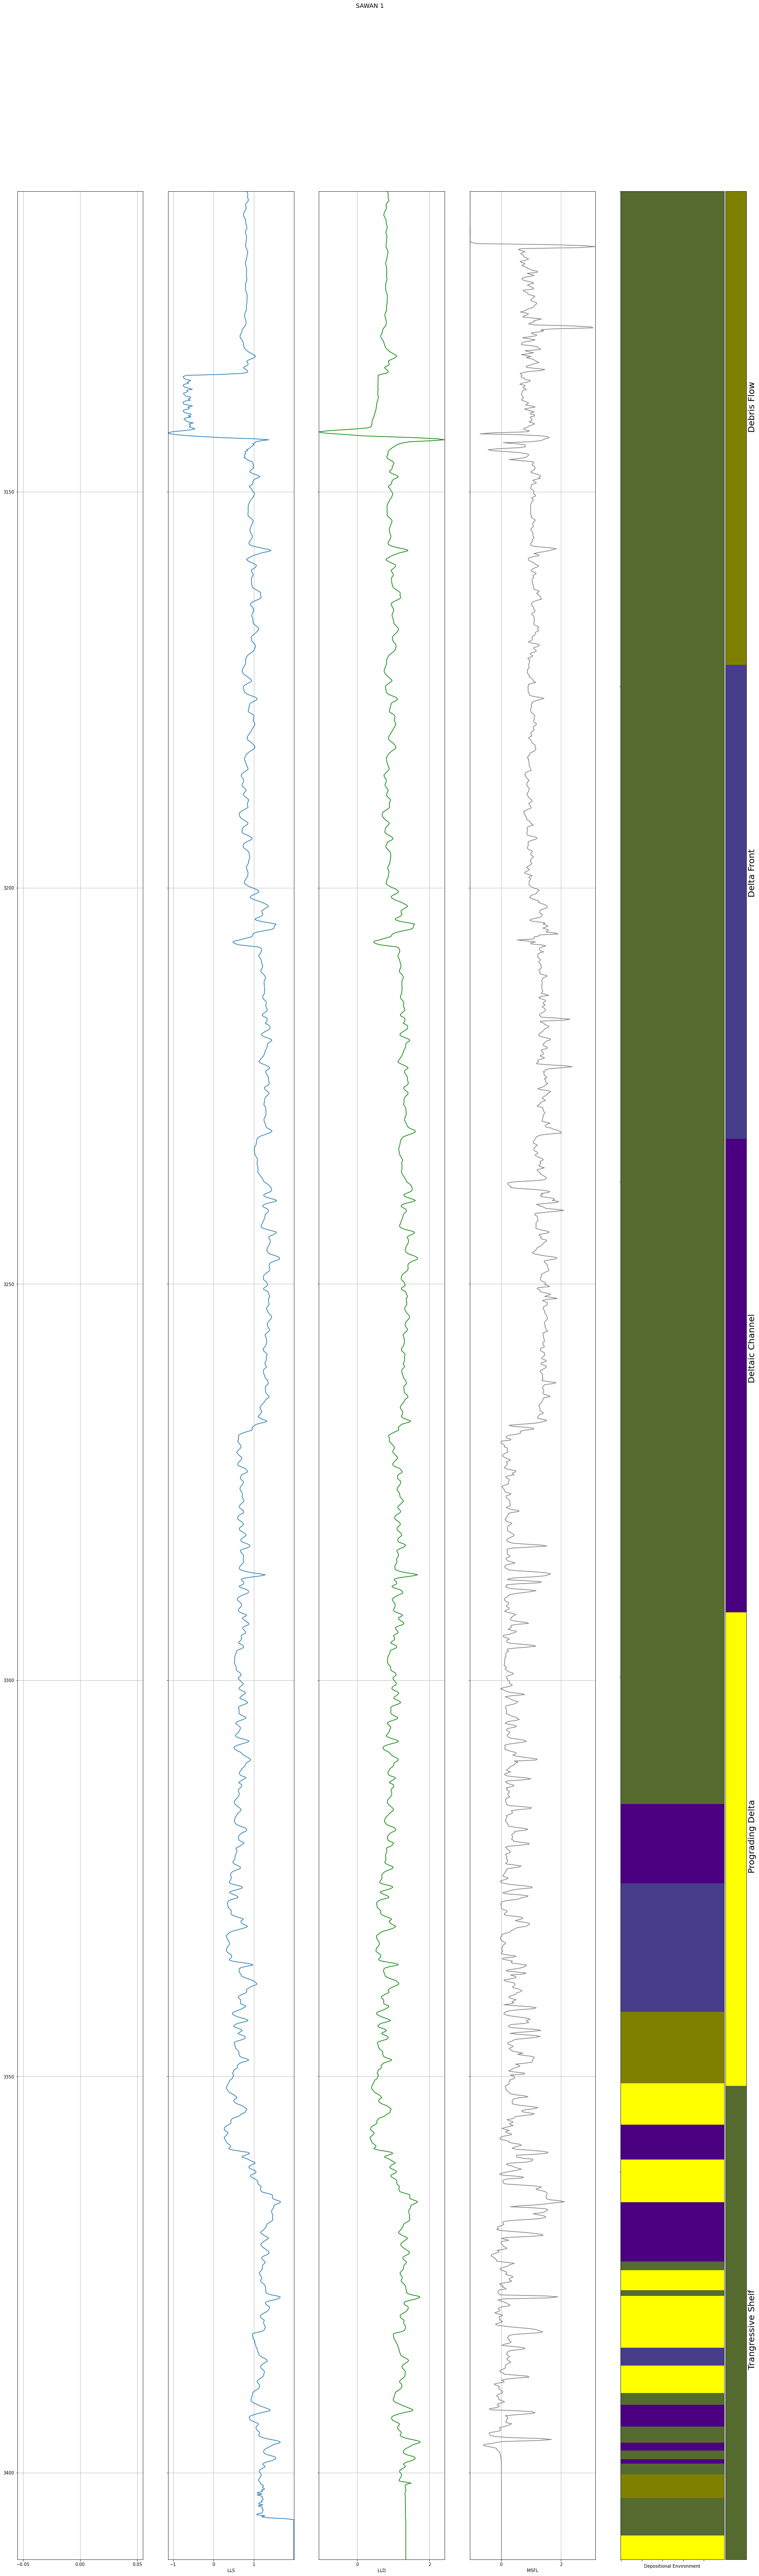

In [136]:
make_facies_log_plot(data[0],DE_color)

### Sawan well : 8  

In [36]:
Sawan_8 = pd.read_excel("Thesis_wells/ZOOM_GR/8.xlsx")
Sawan_8

First    Second  Depositional Environment
0    3112.1   3268.8                       TS
1    3268.8   3273.3                       DC
2    3273.3   3274.3                       TS
3    3274.3   3295.8                       PD
4    3295.8   3296.2                       TS
5    3296.2   3300.1                       DC
6    3300.1   3306.9                       DF
7    3307.1   3308.3                       TS
8    3308.3   3308.8                       PD
9    3308.9   3310.3                       TS
10   3310.3   3325.8                       PD
11   3325.8   3326.6                       TS
12   3326.7   3330.2                       PD
13   3330.3   3331.4                       TS
14   3331.6   3333.1                       PD
15   3333.1   3333.3                       TS
16   3333.4   3335.4                       PD
17   3335.6   3336.6                       TS
18   3336.7   3337.6                       PD
19   3337.7   3338.2                       TS
20   3338.2   3338.9                       PD
21   3339.1   3344.1                       TS
22   3344.1   3344.6                       PD
23   3344.7   3354.1                       TS
24   3354.1   3354.3                       PD
25   3354.4   3355.1                       TS
26   3355.2   3356.7                    DFlow
27   3356.8   3357.4                       TS
28   3357.6   3358.1                       PD
29   3358.2   3359.1                       TS
30   3359.1   3359.6                       PD
31   3359.7   3374.2                       TS
32   3374.2   3374.7                       PD
33   3374.8   3384.6                       TS
34   3384.7   3385.2                       PD
35   3385.3   3410.9                       TS

In [37]:
for i in range(len(Sawan_8)):
  a = rounded_depth[0][rounded_depth[0]["DEPT"]== Sawan_8.loc[i][0]]
  a = a.index[0]
  b = rounded_depth[0][rounded_depth[0]["DEPT"]== Sawan_8.loc[i][1]]
  b = b.index[0]
  Depositional_Environment = Sawan_8.loc[i][2]
  data[0].loc[a:b,"Depositional Environment"]=Depositional_Environment

IndexError: index 0 is out of bounds for axis 0 with size 0

In [38]:
data[1]

DEPT    CALI        GR     THOR    POTA       LLD       LLS   NPHI  \
828   3150.0331  8.7705  139.1423  20.6926  0.0378  0.944922  0.945670  19.47   
829   3150.1581  8.7718  144.2118  20.9369  0.0385  0.905245  0.909486  20.96   
830   3150.2831  8.7708  146.0943  20.9196  0.0389  0.883485  0.888567  22.59   
831   3150.4081  8.7704  144.1929  20.8493  0.0389  0.858874  0.865903  22.42   
832   3150.5331  8.7707  142.0210  20.7480  0.0388  0.835944  0.844800  21.47   
...         ...     ...       ...      ...     ...       ...       ...    ...   
2567  3367.4055  9.1401   91.5003   6.1112  0.0365  1.312408  1.224168   7.03   
2568  3367.5305  9.1162   86.1196   5.8847  0.0359  1.271123  1.186617   7.36   
2569  3367.6555  9.2723   79.8557   5.5642  0.0351  1.225808  1.145224   7.30   
2570  3367.7805  9.2349   79.4018   5.3390  0.0343  1.186982  1.108413   6.72   
2571  3367.9055  9.2692   81.7809   5.2598  0.0337  1.166178  1.086463   6.63   

        RHOB       CGR       SGR   BS    URAN      MSFL  Clay Volume  \
828   2.6974  127.5175  140.3983  8.7  1.9074  1.274186    19.659457   
829   2.7035  129.4126  142.8278  8.7  1.9865  1.118261    21.018043   
830   2.7227  129.8307  142.9681  8.7  1.9453  1.010838    21.536130   
831   2.7483  129.6405  142.2468  8.7  1.8667  0.965343    21.012880   
832   2.7584  129.1682  141.2411  8.7  1.7877  1.047777    20.424478   
...      ...       ...       ...  ...     ...       ...          ...   
2567  2.5577   74.3783   89.4474  8.7  2.2314  0.190051     9.044405   
2568  2.5440   72.7507   87.2385  8.7  2.1453  0.240150     8.045421   
2569  2.5292   70.4482   84.1624  8.7  2.0308  0.180126     6.924220   
2570  2.5238   68.4756   81.4236  8.7  1.9173  0.146283     6.844656   
2571  2.5204   67.3231   79.9027  8.7  1.8628  0.280328     7.264182   

      Depositional Environment  
828                          0  
829                          0  
830                          0  
831                          0  
832                          0  
...                        ...  
2567                         0  
2568                         0  
2569                         0  
2570                         0  
2571                         0  

[1744 rows x 16 columns]

In [139]:
dictt={"TS":1,
       "PD":2,
       "DC":3,
       "DF":4,
       "DFlow":5}

In [140]:
data[1]["Depositional Environment Label"] = data[1]["Depositional Environment"].map(dictt)

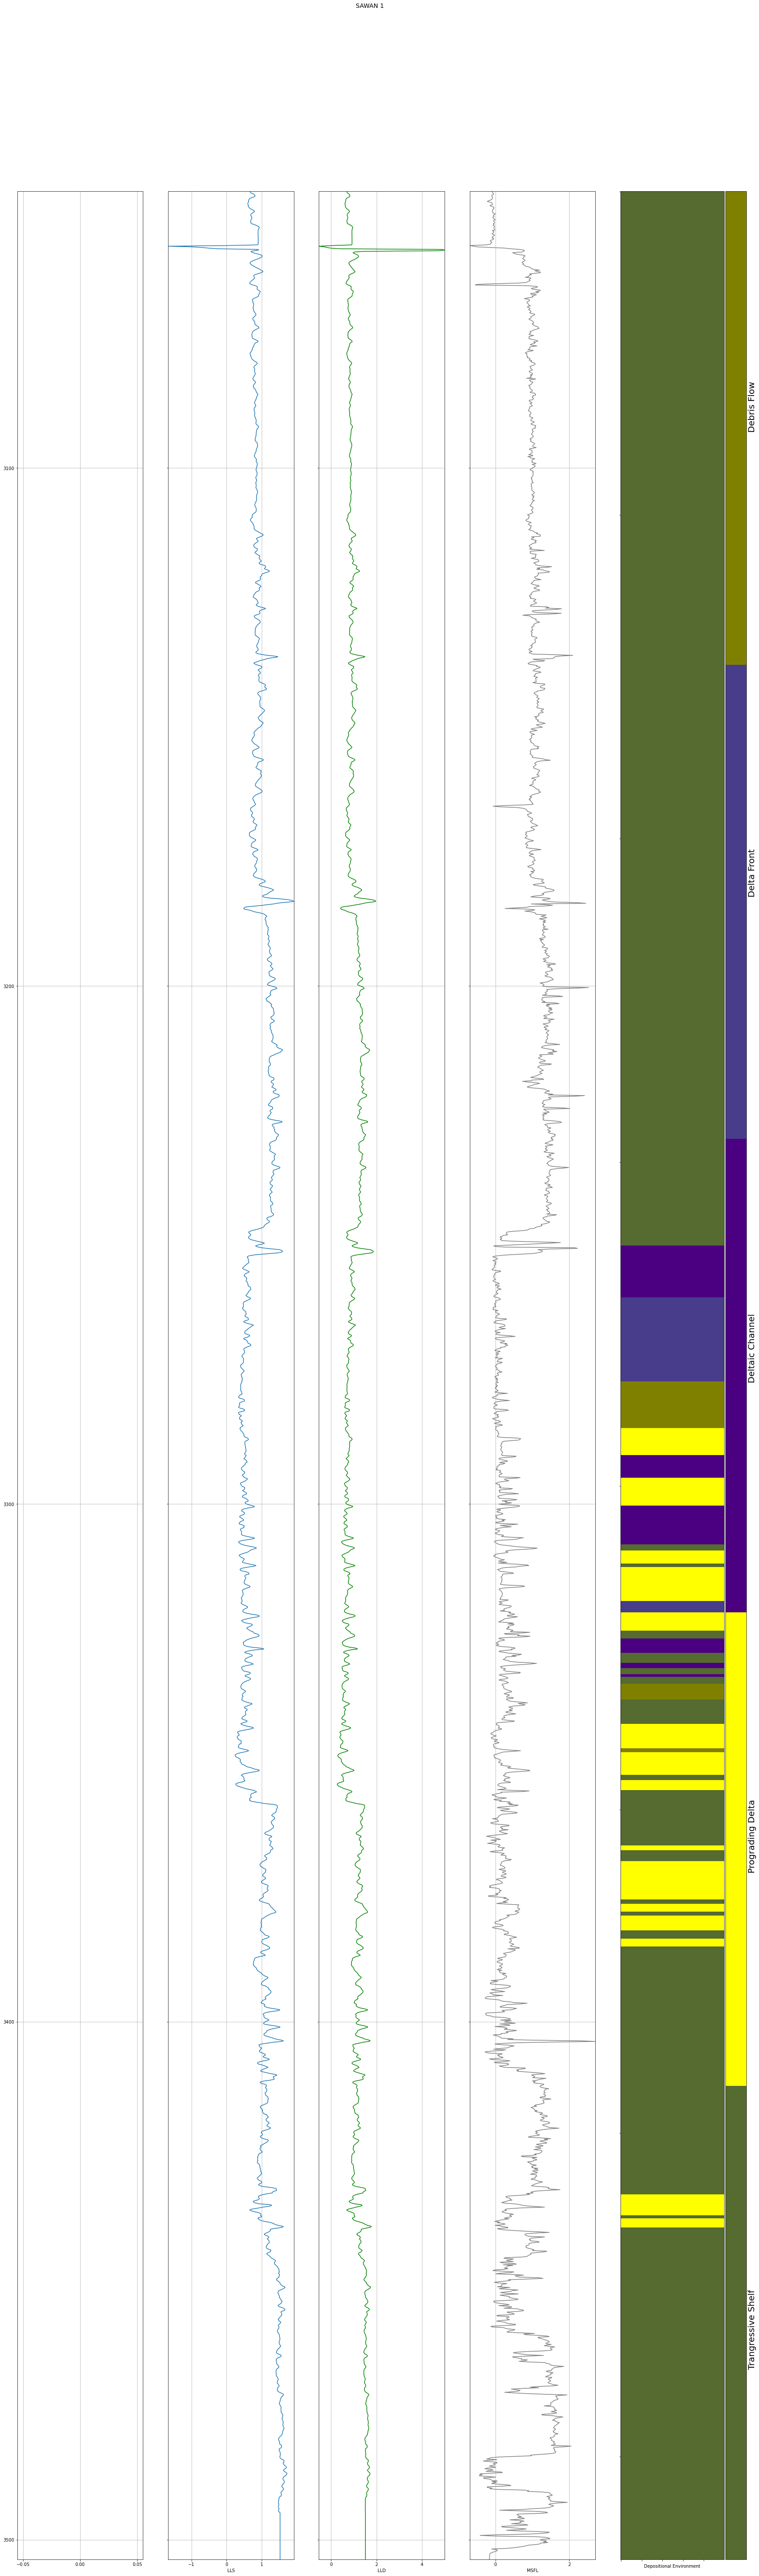

In [141]:
make_facies_log_plot(data[1],DE_color)

### Sawan well : 7

In [178]:
Sawan_7 = pd.read_excel("Thesis_wells/ZOOM_GR/7.xlsx")
Sawan_7

First    Second  Depositional Environment
0    3045.4   3268.7                       TS
1    3268.8   3273.3                       DC
2    3273.4   3274.3                       TS
3    3274.4   3295.7                       PD
4    3295.8   3399.0                       DC
5    3299.2   3306.9                       DF
6    3307.0   3308.3                       TS
7    3308.3   3308.9                       PD
8    3309.0   3310.3                       TS
9    3310.3   3325.7                       PD
10   3325.8   3326.5                       TS
11   3326.7   3330.2                       PD
12   3330.3   3331.4                       TS
13   3331.5   3335.4                       PD
14   3335.5   3336.5                       TS
15   3336.5   3337.5                       PD
16   3337.7   3338.2                       TS
17   3338.2   3339.0                       PD
18   3339.2   3343.9                       TS
19   3344.0   3344.5                       PD
20   3344.7   3353.5                       TS
21   3353.7   3356.0                    DFlow
22   3356.2   3356.7                       PD
23   3356.8   3357.4                    DFlow
24   3357.5   3358.0                       PD
25   3358.2   3358.9                       TS
26   3359.0   3359.5                       PD
27   3359.7   3372.0                       TS
28   3372.2   3372.4                       DC
29   3372.5   3374.0                       TS
30   3374.2   3374.7                       DC
31   3374.8   3384.7                       TS
32   3384.8   3385.3                       PD
33   3385.4   3410.7                       TS

In [179]:
for i in range(len(Sawan_7)):
  a = rounded_depth[3][rounded_depth[3]["DEPT"]== Sawan_7.loc[i][0]]
  a = a.index[0]
  b = rounded_depth[3][rounded_depth[3]["DEPT"]== Sawan_7.loc[i][1]]
  b = b.index[0]
  Depositional_Environment = Sawan_7.loc[i][2]
  data[3].loc[a:b,"Depositional Environment"]=Depositional_Environment

In [180]:
dictt={"TS":1,
       "PD":2,
       "DC":3,
       "DF":4,
       "DFlow":5}

In [181]:
data[3]["Depositional Environment Label"] = data[3]["Depositional Environment"].map(dictt)

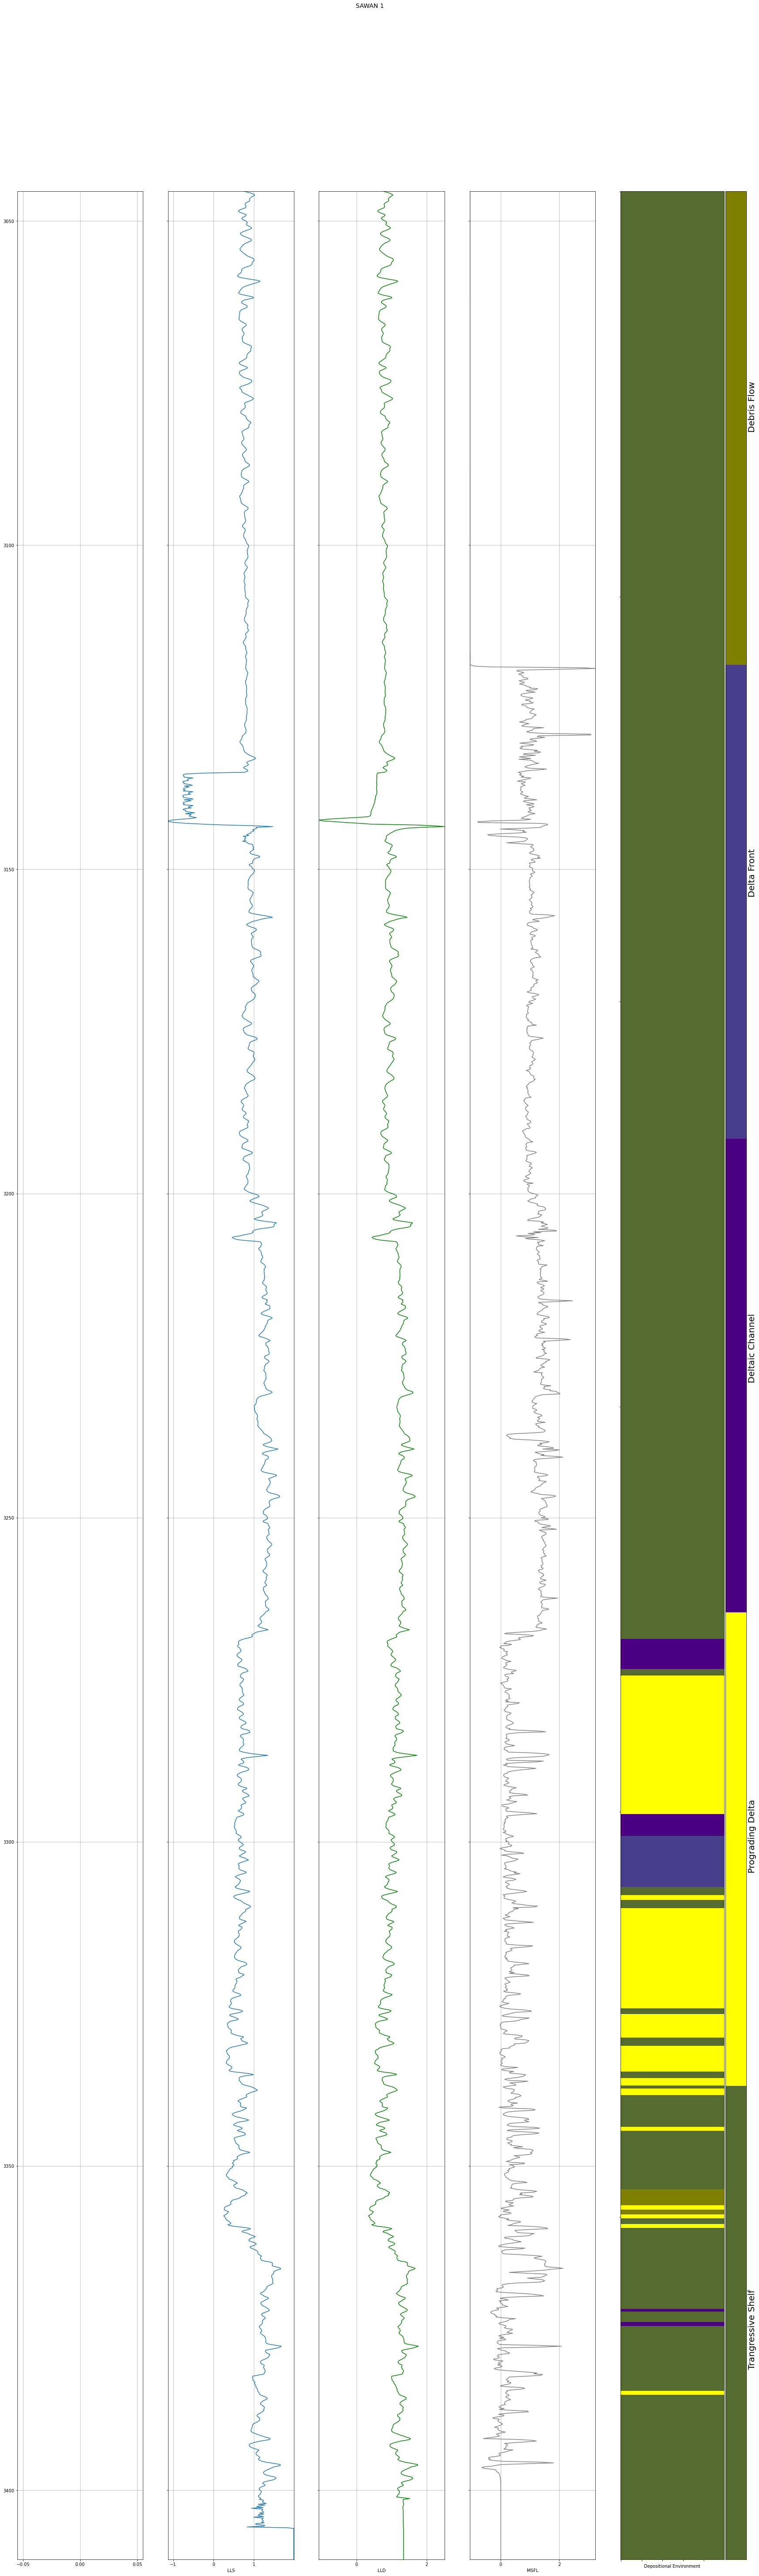

In [182]:
make_facies_log_plot(data[3],DE_color)

# Histogram


In [142]:
data[0]

DEPT    CALI        GR     THOR    POTA       LLD       LLS   NPHI  \
0     3112.0707  8.7006  142.9879  12.7700  0.0203  0.821906  0.816533  35.51   
1     3112.1957  8.7006  144.5001  12.7700  0.0203  0.841410  0.835316  35.51   
2     3112.3207  8.7006  143.0280  12.7700  0.0203  0.854701  0.848522  35.51   
3     3112.4457  8.7006  142.6371  12.7700  0.0203  0.857971  0.852480  35.51   
4     3112.5707  8.7006  143.3424  12.7700  0.0203  0.855780  0.850236  35.51   
...         ...     ...       ...      ...     ...       ...       ...    ...   
2387  3410.4457  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   
2388  3410.5707  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   
2389  3410.6957  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   
2390  3410.8207  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   
2391  3410.9457  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   

        RHOB       CGR  ...   BS     URAN      MSFL  Depositional Environment  \
0     2.3998   79.1427  ...  8.5  -1.5943 -1.045275                        TS   
1     2.3998   79.1427  ...  8.5  -1.5943 -1.045757                        TS   
2     2.3998   79.1427  ...  8.5  -1.5943 -1.045757                        TS   
3     2.3998   79.1427  ...  8.5  -1.5943 -1.045757                        TS   
4     2.3998   79.1427  ...  8.5  -1.5943 -1.045275                        TS   
...      ...       ...  ...  ...      ...       ...                       ...   
2387  2.2798  319.2700  ...  8.5 -28.0069  0.009068                        TS   
2388  2.2798  319.2700  ...  8.5 -28.0069  0.009068                        TS   
2389  2.2798  319.2700  ...  8.5 -28.0069  0.009068                        TS   
2390  2.2798  319.2700  ...  8.5 -28.0069  0.009068                        TS   
2391  2.2798  319.2700  ...  8.5 -28.0069  0.009068                        TS   

     Depositional Environment Label  Density Porosity  Average Porosity  \
0                                 1         18.140351         26.825175   
1                                 1         18.140351         26.825175   
2                                 1         18.140351         26.825175   
3                                 1         18.140351         26.825175   
4                                 1         18.140351         26.825175   
...                             ...               ...               ...   
2387                              2         25.157895         18.538947   
2388                              2         25.157895         18.538947   
2389                              2         25.157895         18.538947   
2390                              2         25.157895         18.538947   
2391                              2         25.157895         18.538947   

      Clay Volume  Clay Effect  Effective Porosity  
0       14.384298     1.014842           25.810334  
1       14.659206     1.034237           25.790938  
2       14.391557     1.015354           25.809822  
3       14.320858     1.010366           25.814810  
4       14.448534     1.019374           25.805802  
...           ...          ...                 ...  
2387     5.969705     0.421175           18.117772  
2388     5.969705     0.421175           18.117772  
2389     5.969705     0.421175           18.117772  
2390     5.969705     0.421175           18.117772  
2391     5.969705     0.421175           18.117772  

[2392 rows x 21 columns]

In [143]:
data[0]

DEPT    CALI        GR     THOR    POTA       LLD       LLS   NPHI  \
0     3112.0707  8.7006  142.9879  12.7700  0.0203  0.821906  0.816533  35.51   
1     3112.1957  8.7006  144.5001  12.7700  0.0203  0.841410  0.835316  35.51   
2     3112.3207  8.7006  143.0280  12.7700  0.0203  0.854701  0.848522  35.51   
3     3112.4457  8.7006  142.6371  12.7700  0.0203  0.857971  0.852480  35.51   
4     3112.5707  8.7006  143.3424  12.7700  0.0203  0.855780  0.850236  35.51   
...         ...     ...       ...      ...     ...       ...       ...    ...   
2387  3410.4457  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   
2388  3410.5707  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   
2389  3410.6957  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   
2390  3410.8207  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   
2391  3410.9457  6.5254   89.5152  40.5008  0.1077  1.344168  1.993877  11.92   

        RHOB       CGR  ...   BS     URAN      MSFL  Depositional Environment  \
0     2.3998   79.1427  ...  8.5  -1.5943 -1.045275                        TS   
1     2.3998   79.1427  ...  8.5  -1.5943 -1.045757                        TS   
2     2.3998   79.1427  ...  8.5  -1.5943 -1.045757                        TS   
3     2.3998   79.1427  ...  8.5  -1.5943 -1.045757                        TS   
4     2.3998   79.1427  ...  8.5  -1.5943 -1.045275                        TS   
...      ...       ...  ...  ...      ...       ...                       ...   
2387  2.2798  319.2700  ...  8.5 -28.0069  0.009068                        TS   
2388  2.2798  319.2700  ...  8.5 -28.0069  0.009068                        TS   
2389  2.2798  319.2700  ...  8.5 -28.0069  0.009068                        TS   
2390  2.2798  319.2700  ...  8.5 -28.0069  0.009068                        TS   
2391  2.2798  319.2700  ...  8.5 -28.0069  0.009068                        TS   

     Depositional Environment Label  Density Porosity  Average Porosity  \
0                                 1         18.140351         26.825175   
1                                 1         18.140351         26.825175   
2                                 1         18.140351         26.825175   
3                                 1         18.140351         26.825175   
4                                 1         18.140351         26.825175   
...                             ...               ...               ...   
2387                              2         25.157895         18.538947   
2388                              2         25.157895         18.538947   
2389                              2         25.157895         18.538947   
2390                              2         25.157895         18.538947   
2391                              2         25.157895         18.538947   

      Clay Volume  Clay Effect  Effective Porosity  
0       14.384298     1.014842           25.810334  
1       14.659206     1.034237           25.790938  
2       14.391557     1.015354           25.809822  
3       14.320858     1.010366           25.814810  
4       14.448534     1.019374           25.805802  
...           ...          ...                 ...  
2387     5.969705     0.421175           18.117772  
2388     5.969705     0.421175           18.117772  
2389     5.969705     0.421175           18.117772  
2390     5.969705     0.421175           18.117772  
2391     5.969705     0.421175           18.117772  

[2392 rows x 21 columns]

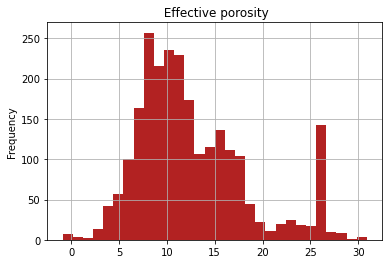

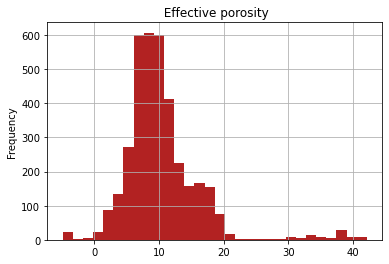

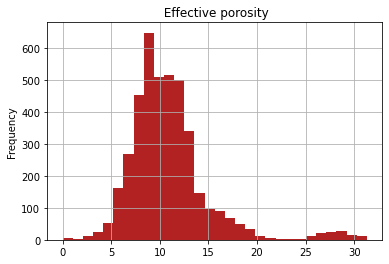

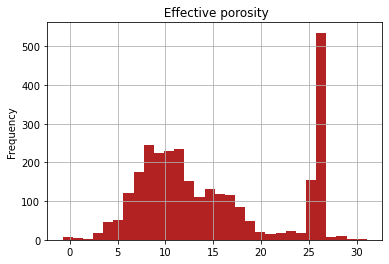

In [144]:
for i in data:
    plt.title(" Effective porosity")
    i["Effective Porosity"].plot.hist(grid=True, bins=30,rwidth=1 , color = "firebrick")
    plt.show()

<AxesSubplot:xlabel='Effective Porosity', ylabel='Count'>

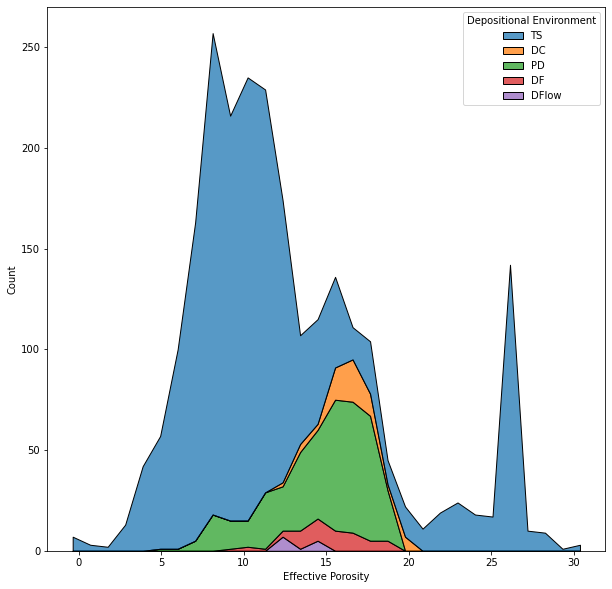

In [151]:
plt.figure(figsize=(10,10))
sns.histplot(data=data[0], x="Effective Porosity", bins=30,hue="Depositional Environment",element="poly",multiple="stack")

In [152]:
labels = ["TS","PD","DC","TS","DFlow"]
DE_color
pie=[]
for i in labels:
    a = data[0][data[0]["Depositional Environment"]==i]["Effective Porosity"].mean()
    pie.append(a)

In [153]:
df = pd.DataFrame({"effective average porosity":pie,"labels":labels,"colors":DE_color})
df

effective average porosity labels          colors
0                   11.898523     TS  darkolivegreen
1                   14.571467     PD          yellow
2                   16.505608     DC          indigo
3                   11.898523     TS   darkslateblue
4                   13.228595  DFlow           olive

In [154]:
colors= ['darkolivegreen', 'yellow', 'indigo', 'darkslateblue']

In [155]:
fig = px.pie(df,  values="effective average porosity", names="labels", color_discrete_sequence=DE_color)
fig.show()

# Well location

In [156]:
wells_name = ["SAWAN-01", "SAWAN-07", 'SAWAN-08', 'SAWAN-02']

In [157]:
y_coordinate = [026.991828 ,026.999283 ,027.009156 ,027.022972 ]
x_coordinate = [068.906992 ,068.923317 ,068.933394 ,068.933806 ]
correlation = ["in-correlation","in-correlation","in-correlation","in-correlation"]

In [158]:
maps = pd.DataFrame({"y_coordinate":y_coordinate,"x_coordinate":x_coordinate},index=wells_name)

In [159]:
maps.index[0]

'SAWAN-01'

In [160]:
maps.loc["SAWAN-08"][0]

27.009156

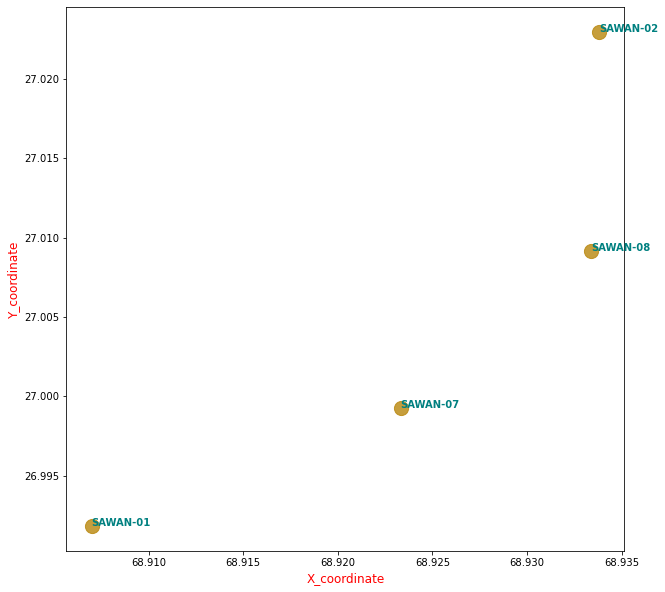

In [161]:
plt.figure(figsize=(10,10))
sns.regplot(data=maps, x="x_coordinate", y="y_coordinate", fit_reg=False, color="darkgoldenrod", scatter_kws={'s':200})
plt.xlabel("X_coordinate",color="red",fontsize=12)
plt.ylabel("Y_coordinate",color="red",fontsize=12)
for i in maps.index:
     plt.text(maps.loc[i][1], maps.loc[i][0], i, horizontalalignment='left', size='medium', color='teal', weight='semibold')
plt.show()


In [162]:
maps_analyzed = pd.DataFrame({"y_coordinate":y_coordinate,"x_coordinate":x_coordinate,"correlation":correlation},index=wells_name)

In [163]:
maps.loc["SAWAN-01"].values

array([26.991828, 68.906992])

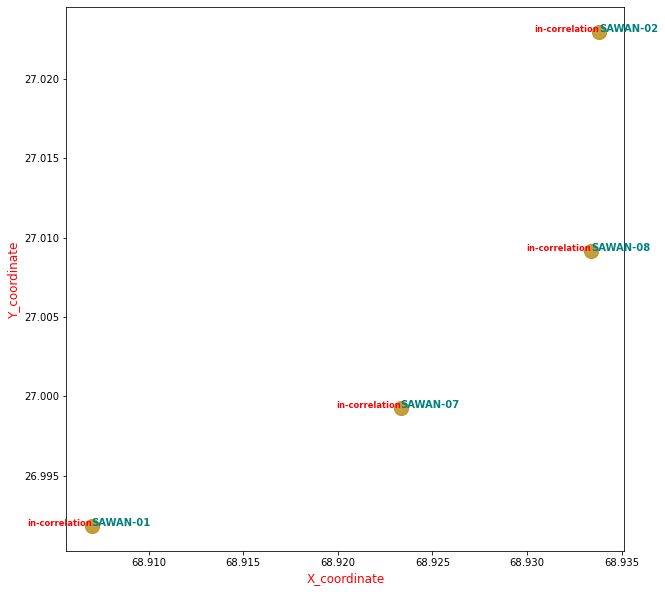

In [164]:
plt.figure(figsize=(10,10))
sns.regplot(data=maps_analyzed, x="x_coordinate", y="y_coordinate", fit_reg=False, color="darkgoldenrod", scatter_kws={'s':200})
plt.xlabel("X_coordinate",color="red",fontsize=12)
plt.ylabel("Y_coordinate",color="red",fontsize=12)
for i in maps_analyzed.index:
     plt.text(maps_analyzed.loc[i][1], maps_analyzed.loc[i][0], i, horizontalalignment='left', size='medium', color='teal', weight='semibold')
for j in range(len(maps_analyzed.index)):
     plt.text(maps_analyzed.iloc[j][1], maps_analyzed.iloc[j][0], maps_analyzed["correlation"][j], horizontalalignment='right', size='small', color='red', weight='semibold')
plt.show()